# (구별) 자동차, 주차장, 불법주차 데이터분석

### 단변량분석

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False)
plt.rcParams['figure.max_open_warning'] = 50

In [4]:
pd.options.display.max_columns = 100

In [5]:
seoul_car = pd.read_csv('C:/Users/User/Desktop/강서구 빅데이터 공모전/Merge 데이터/(구별 통합) 자동차, 주차장, 불법주차.csv', encoding='cp949')

In [6]:
seoul_car.head(2)

,자치구,총 자동차 합계,관용 합계,자가용 합계,영업용 합계,승용차 합계,승용차 관용,승용차 자가용,승용차 영업용,승합차 합계,승합차 관용,승합차 자가용,승합차 영업용,화물차 합계,화물차 관용,화물차 자가용,화물차 영업용,특수차 합계,특수차 관용,특수차 자가용,특수차 영업용,이륜차 합계,이륜차 관용,이륜차 자가용,이륜차 영업용,자동차 등록 대수,주차 면수,주차장 확보율,자동차등록대수(증감),주차면수(증감),주차장확보율(증감),자가용 승용차 합계,주택가 주차장 합계,주택가 주차장 노상,주택가 주차장 노외,주택가 주차장 건축물 부설,주택가 주차장 확보율,2022 단속건수
0,종로구,50337,3811,44388,2138,41557,1703,39056,798,3472,1659,1558,255,5050,344,3695,1011,258,105,79,74,12917,433,12484,0,50336,92062,182.9,0.0,-4.5,-4.2,39056,34690,1661,1178,31851,88.8,112082
1,중구,58836,1275,52526,5035,48126,298,44948,2880,2871,775,1868,228,7427,184,5441,1802,412,18,269,125,14159,217,13942,0,58837,109153,185.5,-3.8,0.5,4.2,44948,34056,861,2129,31066,75.8,182320


In [7]:
seoul_car.shape

(25, 38)

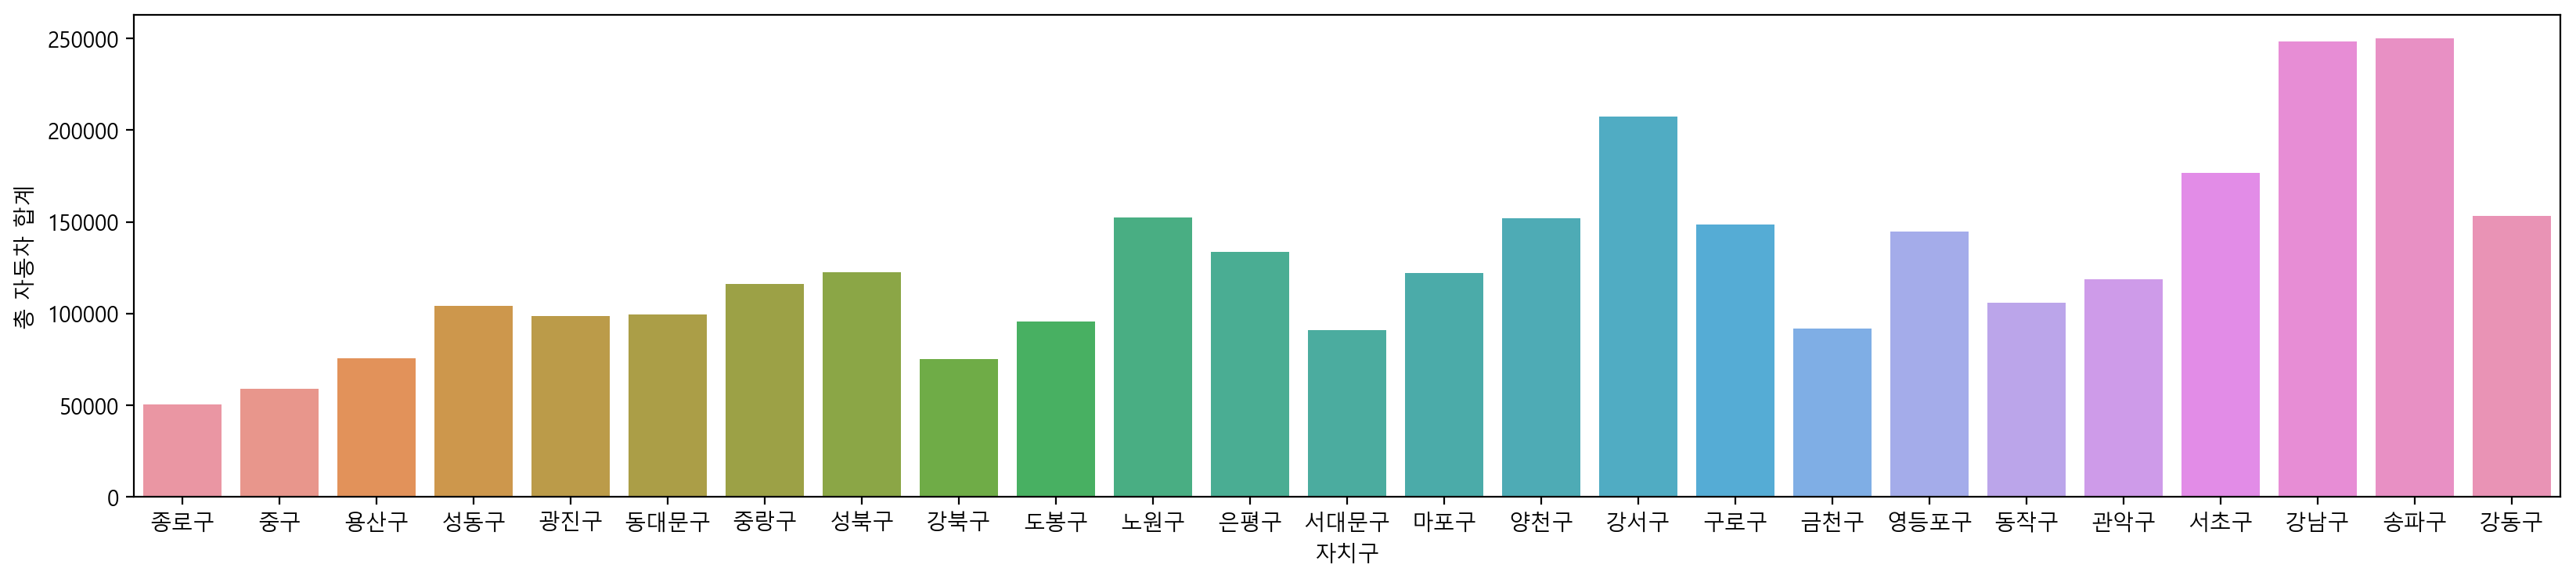

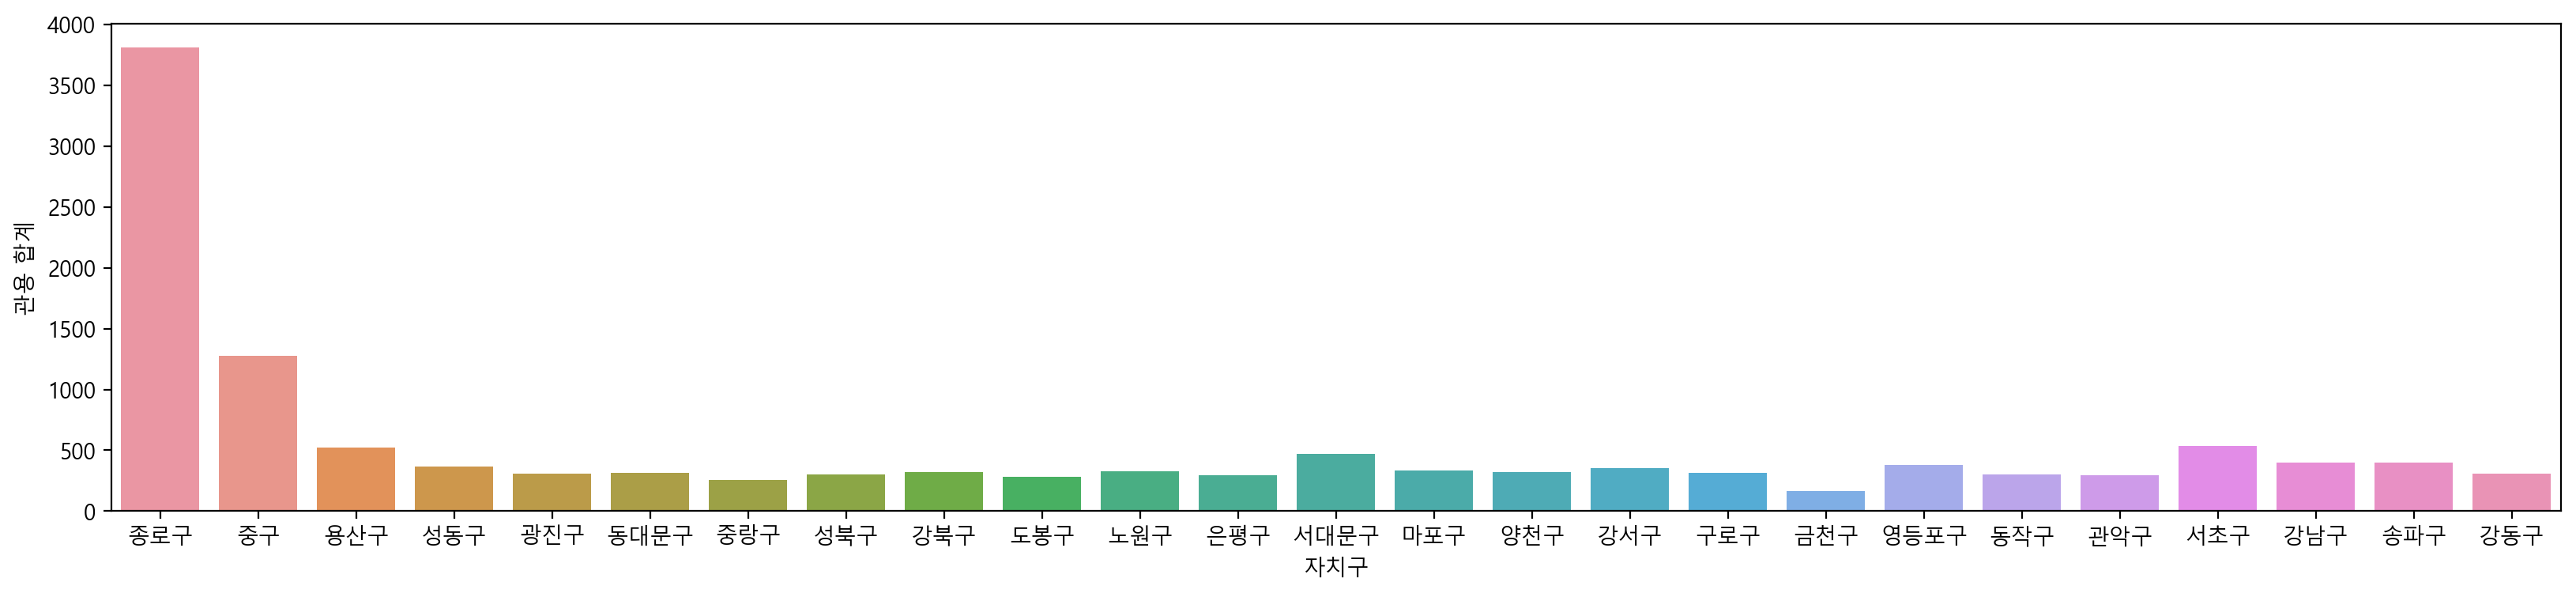

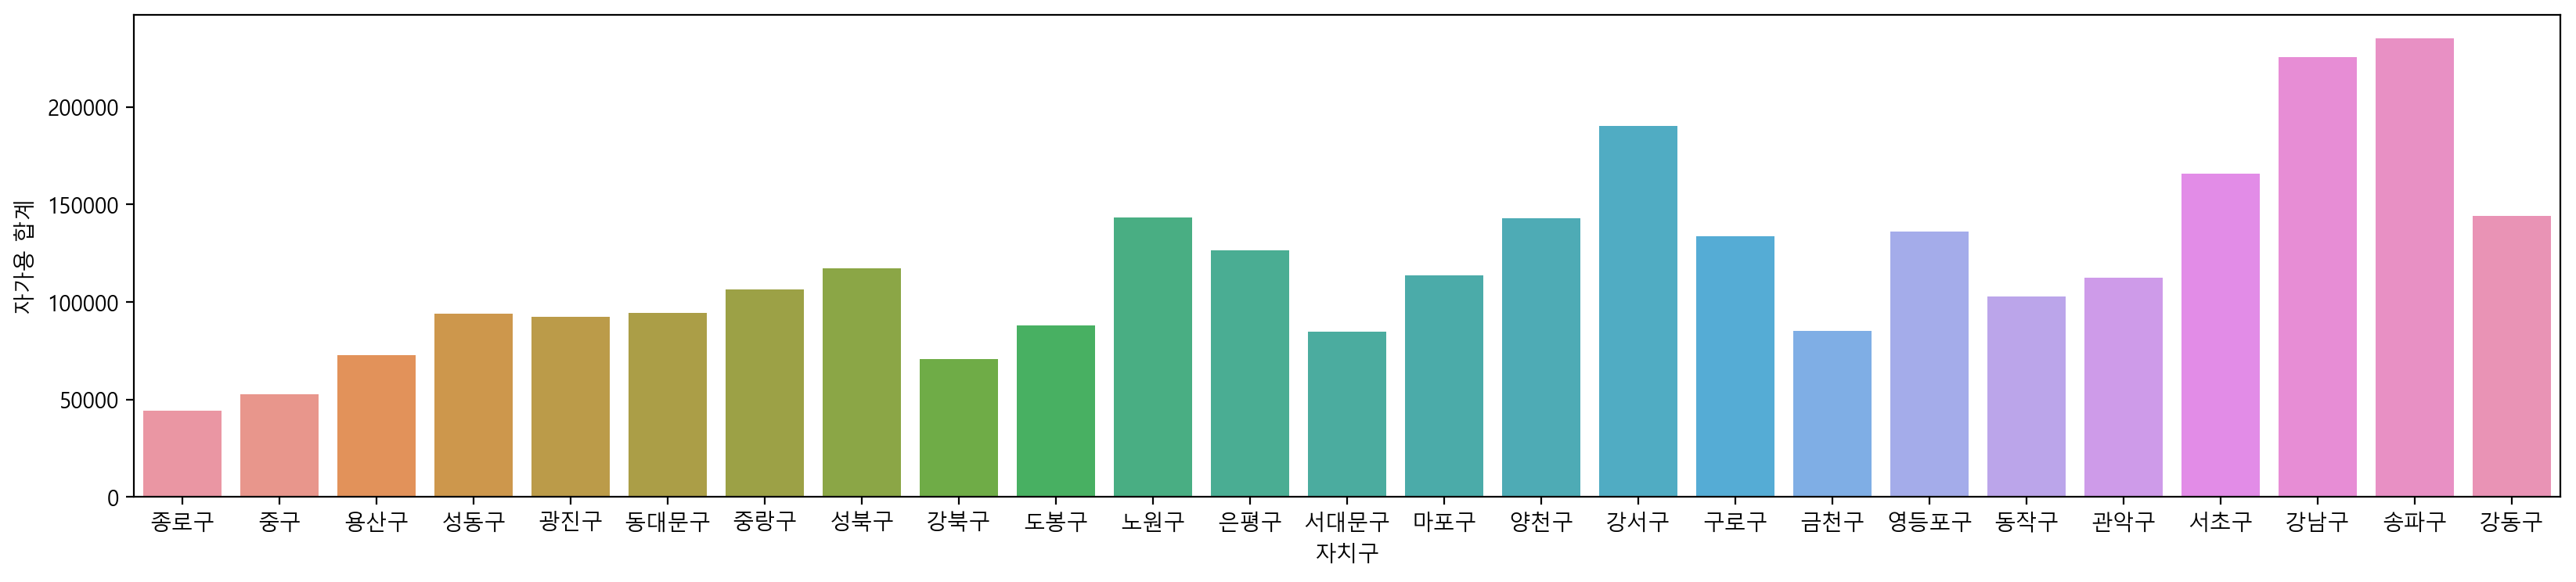

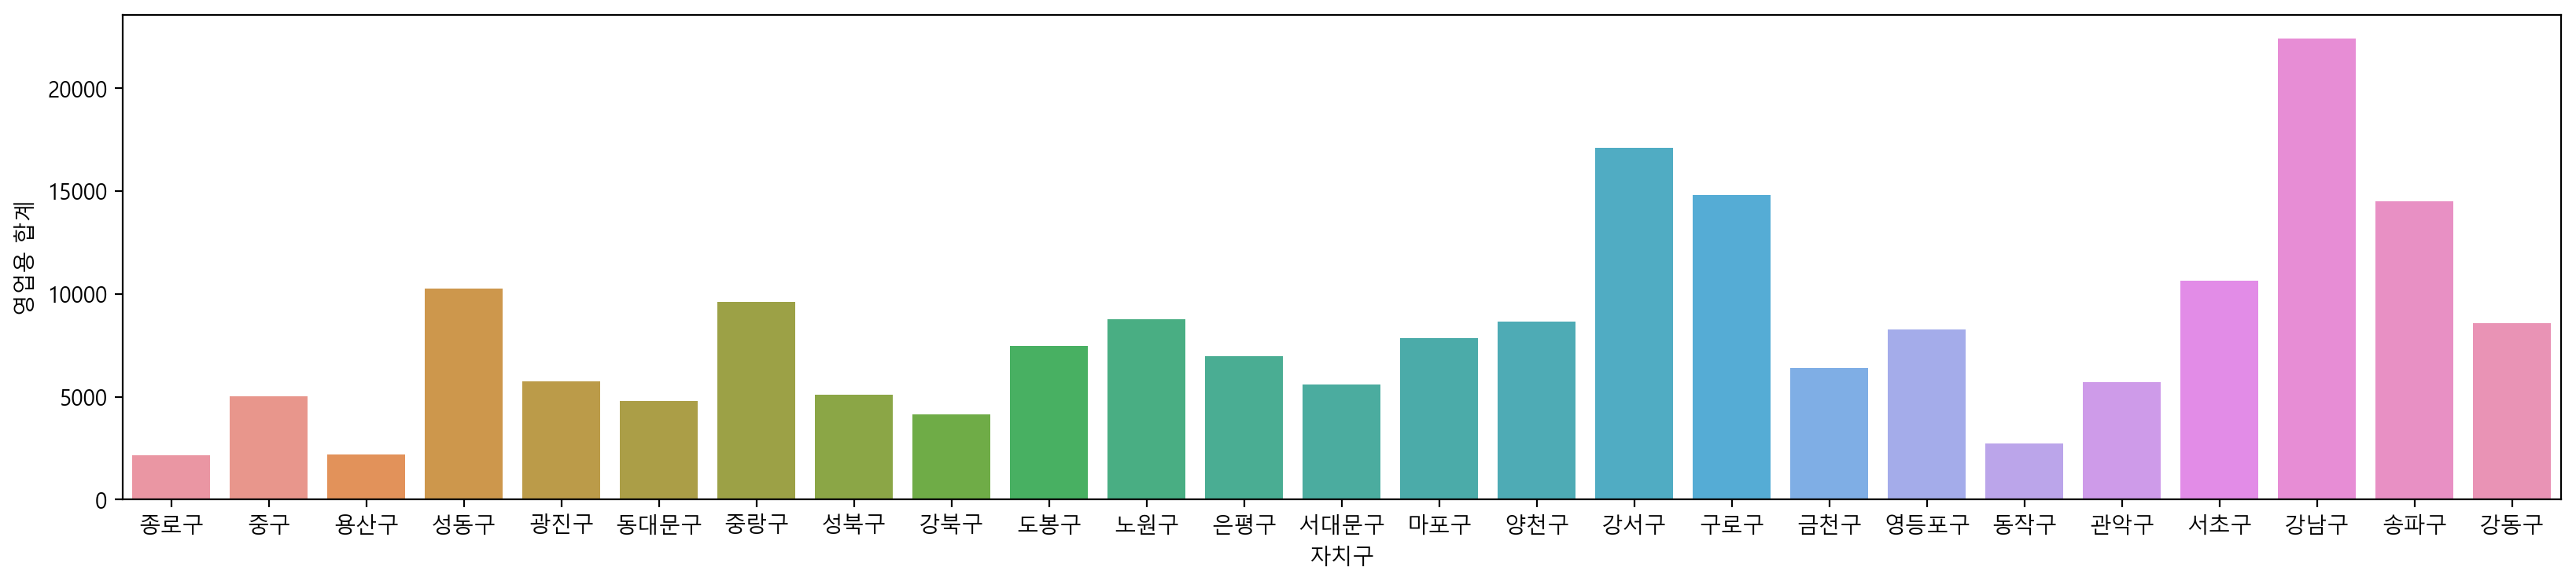

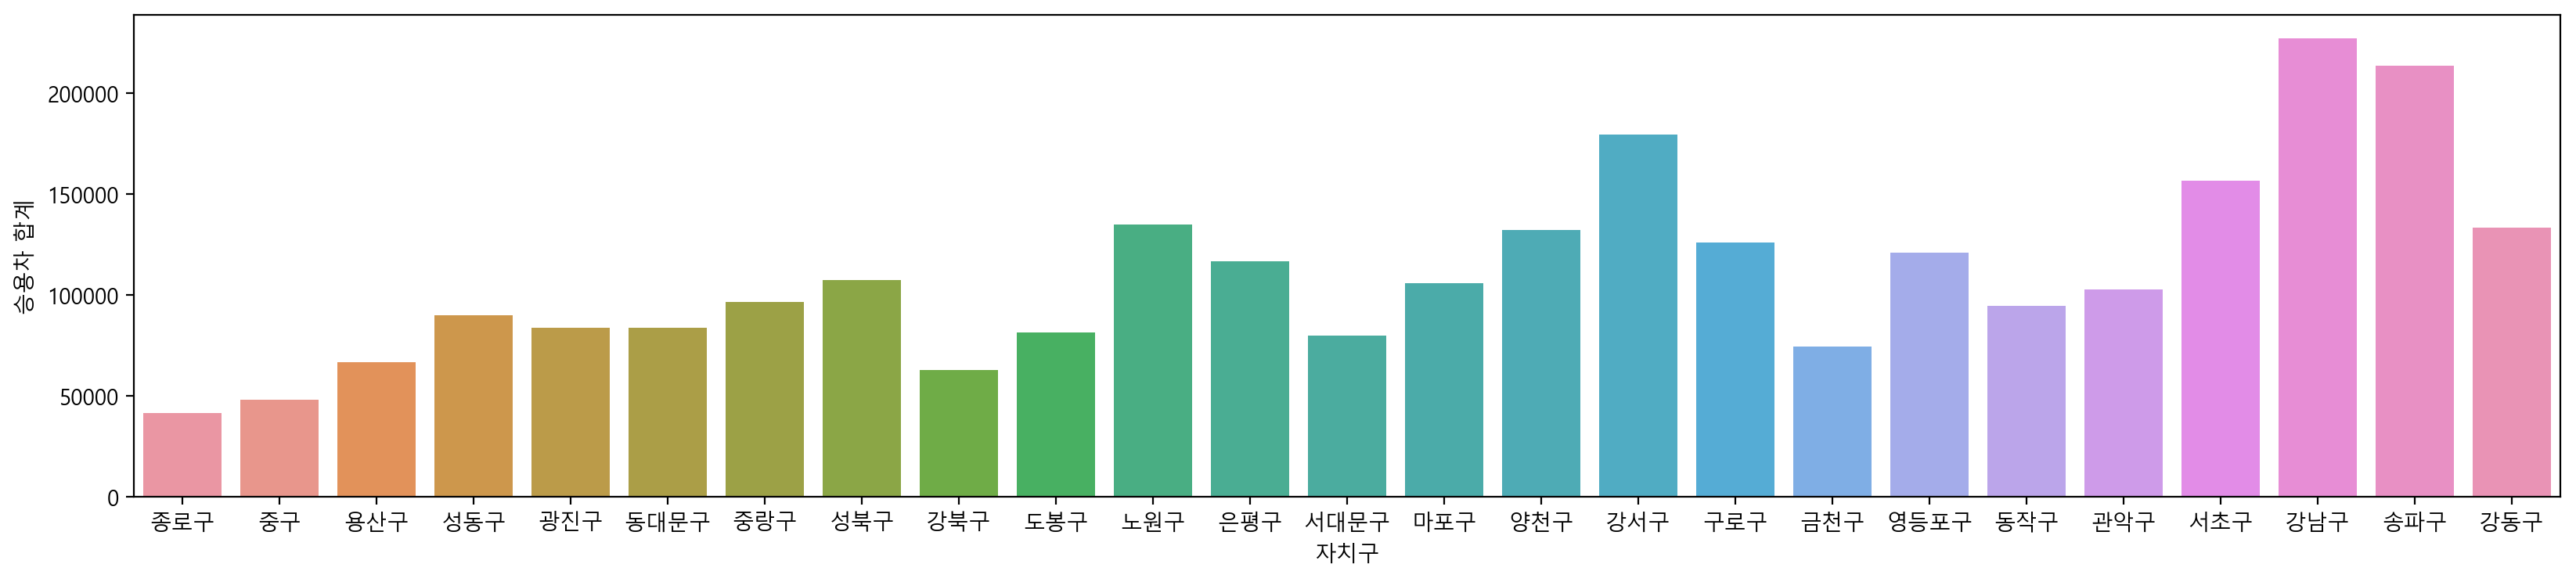

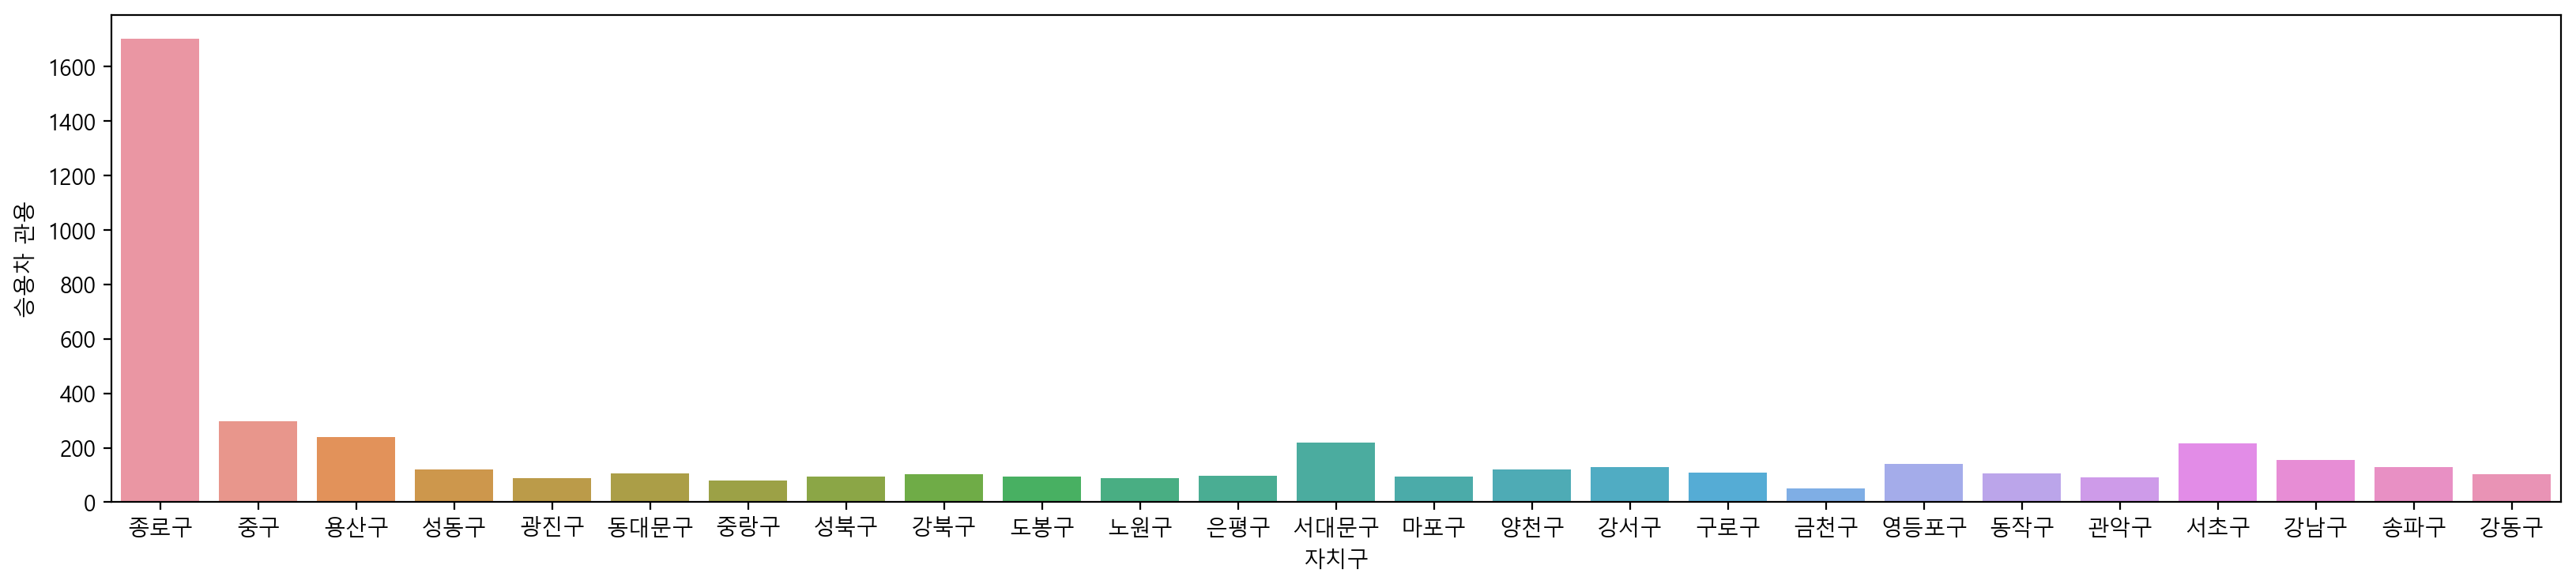

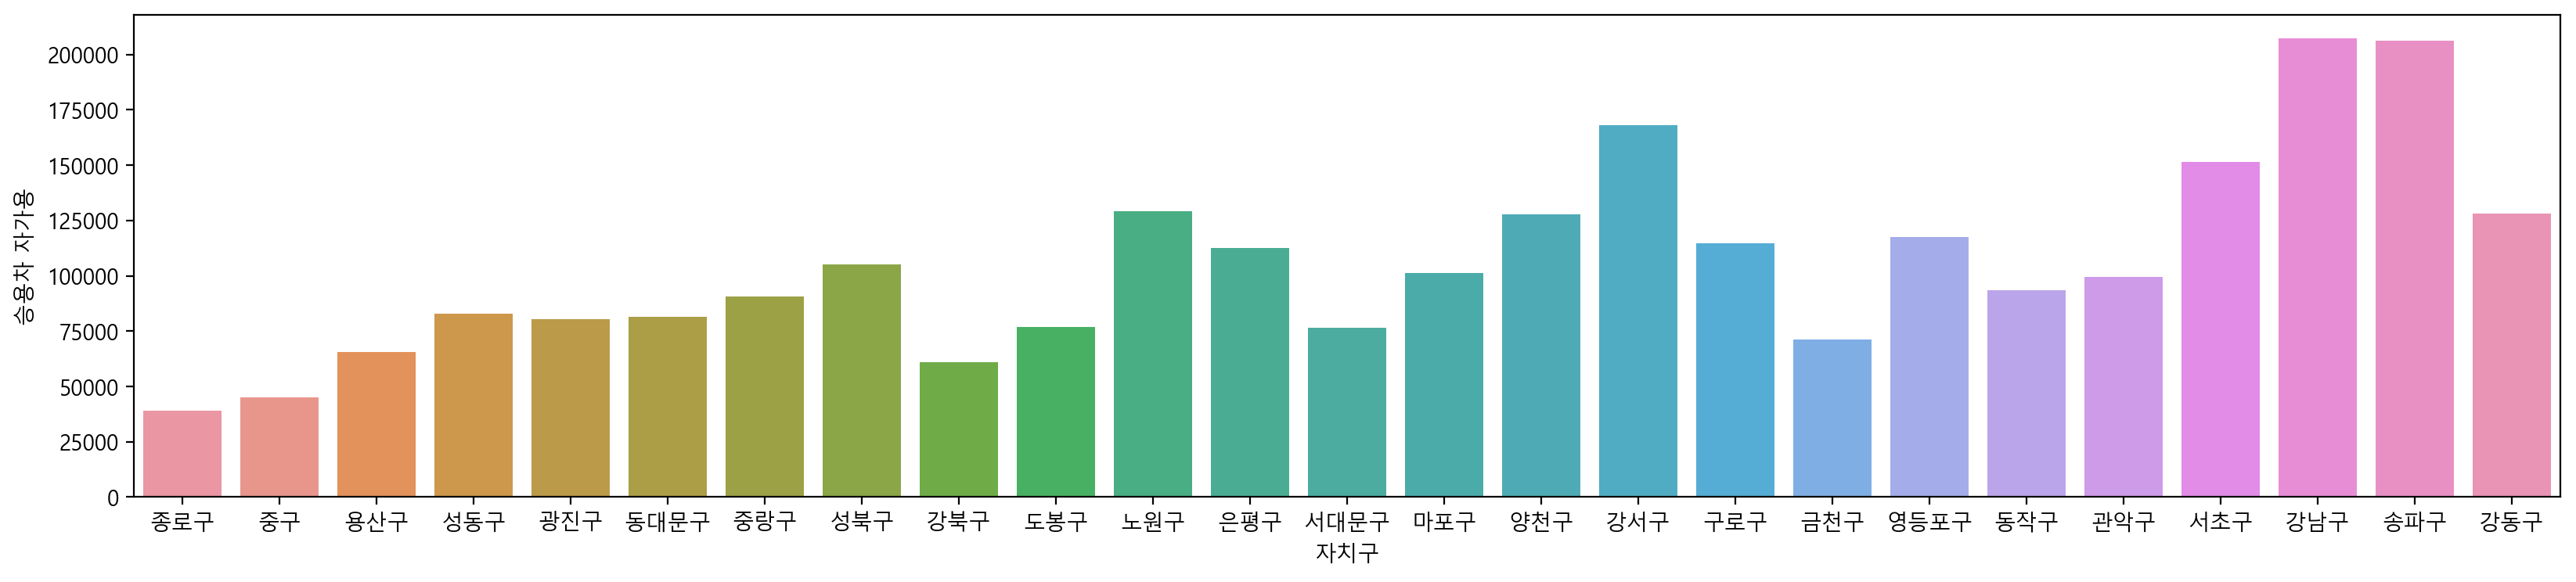

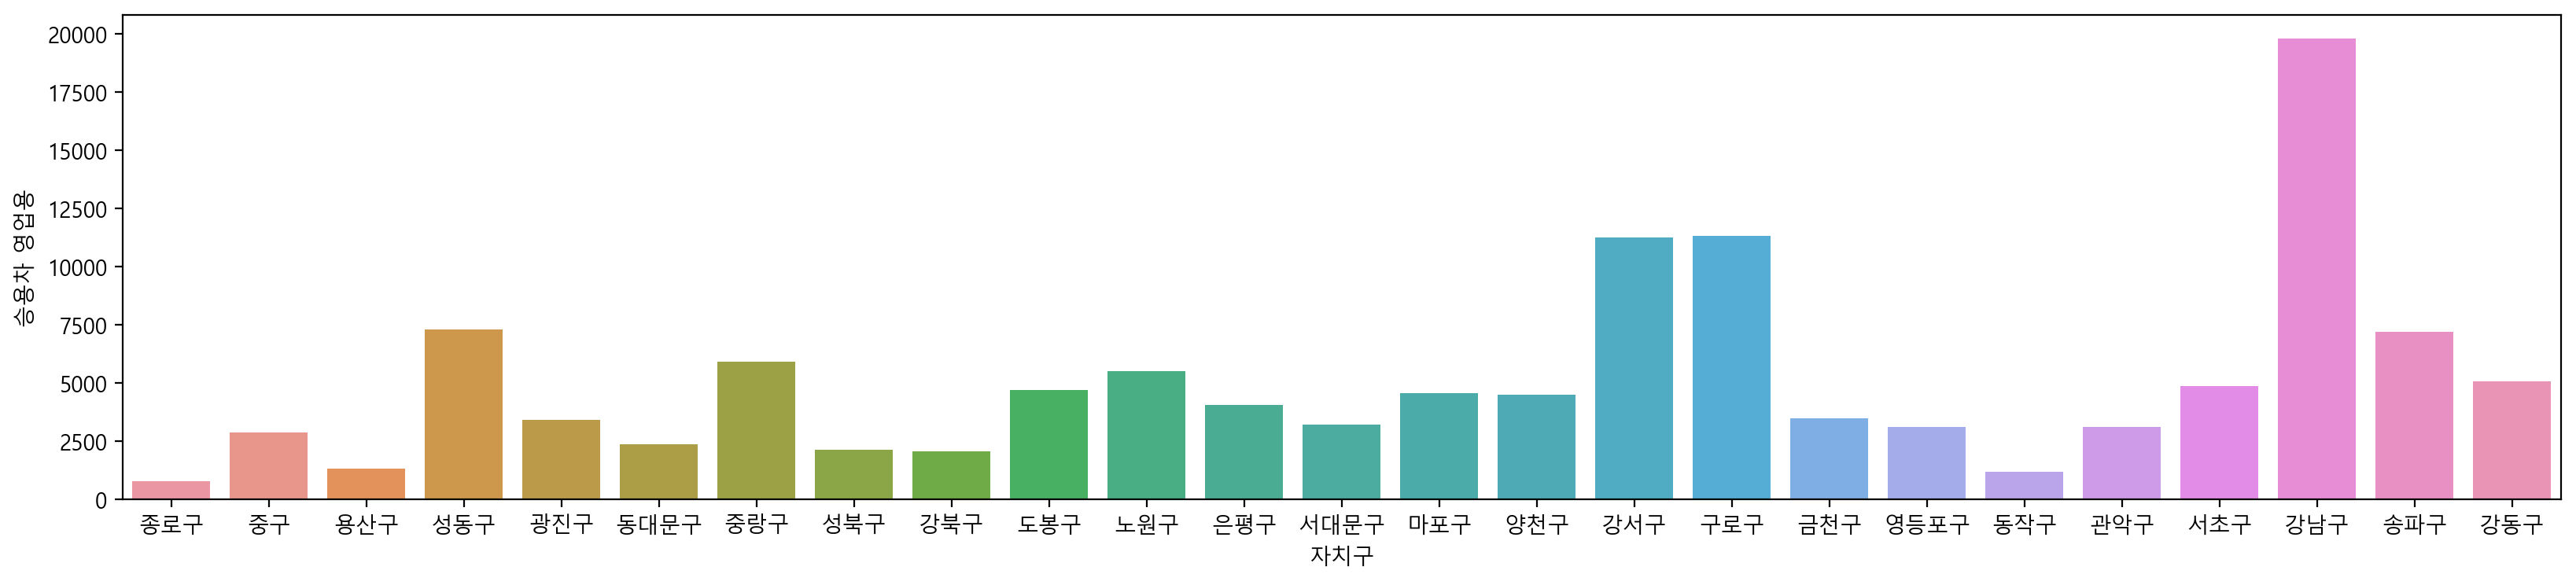

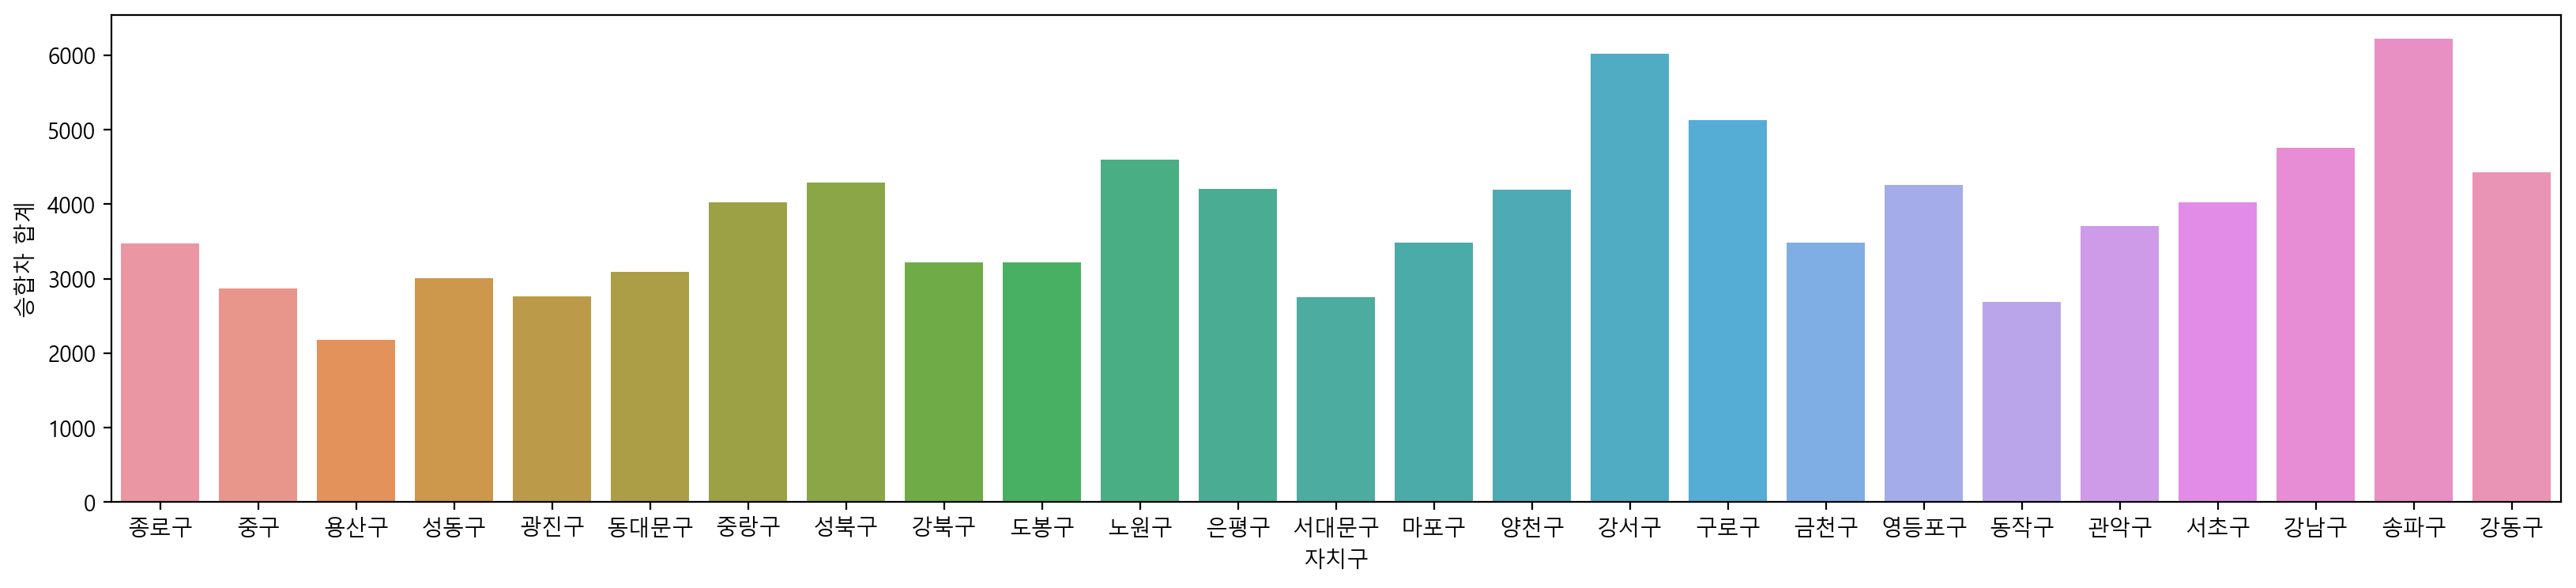

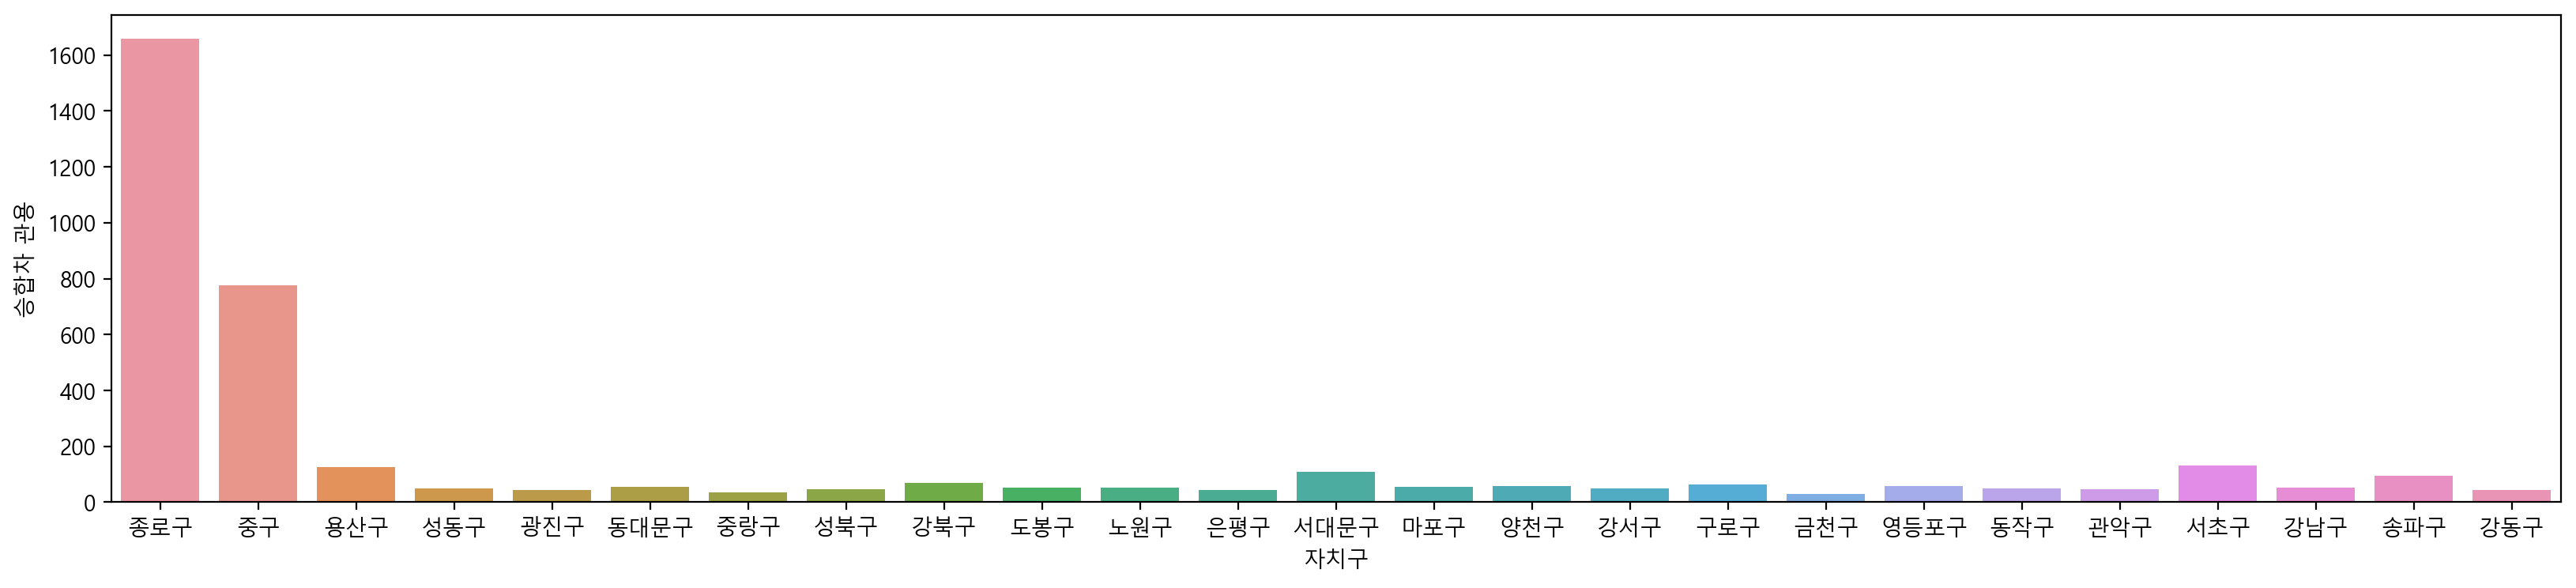

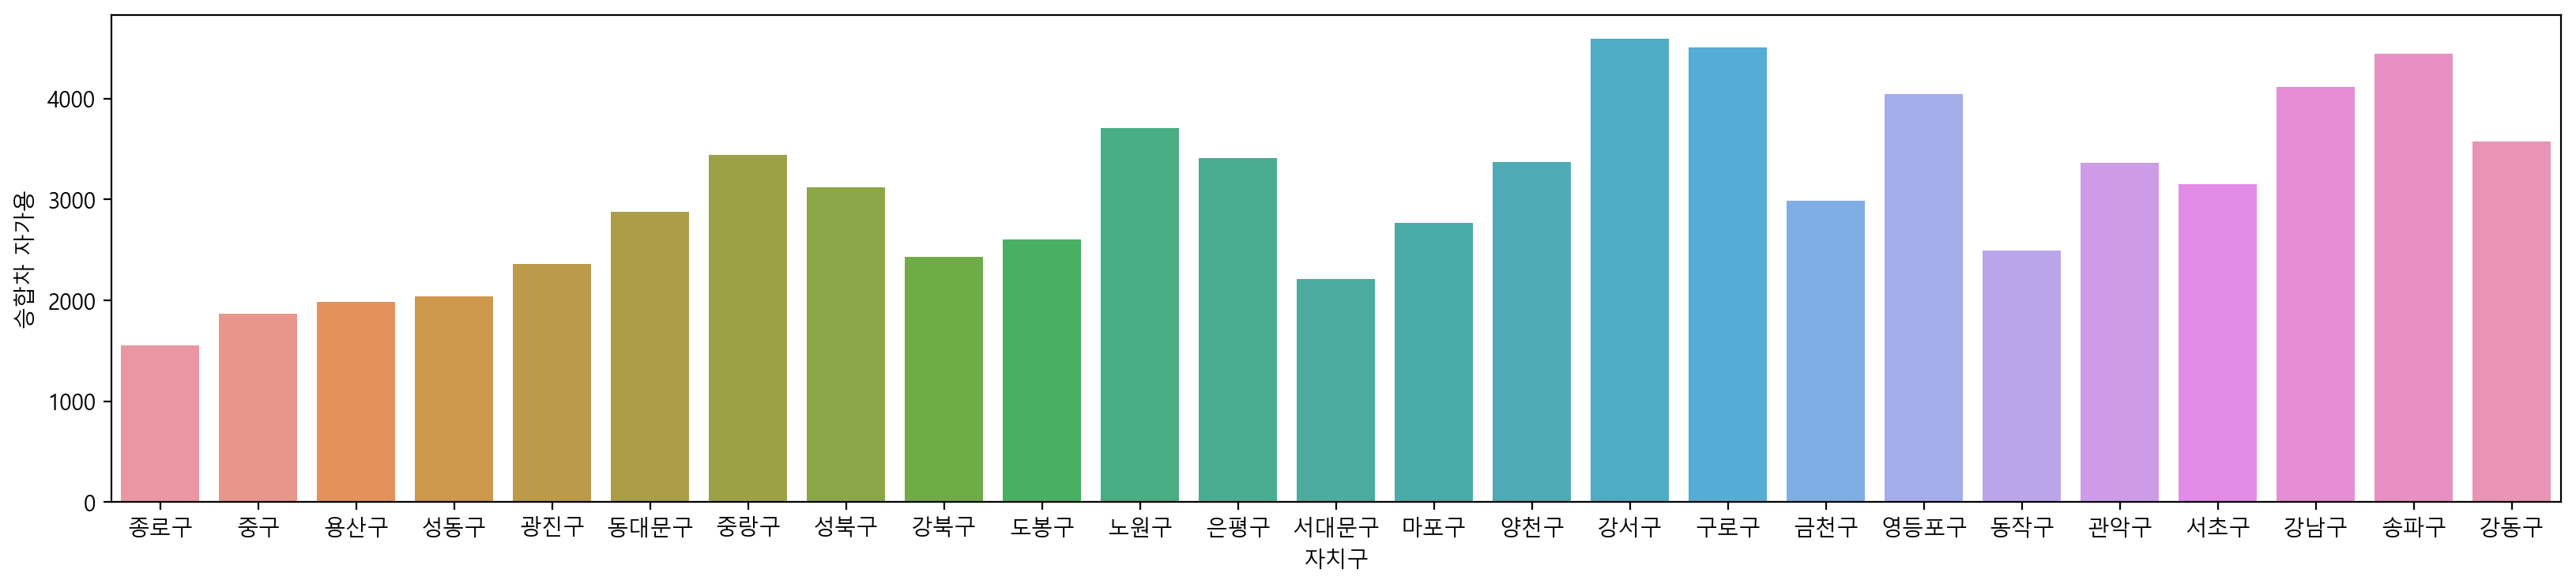

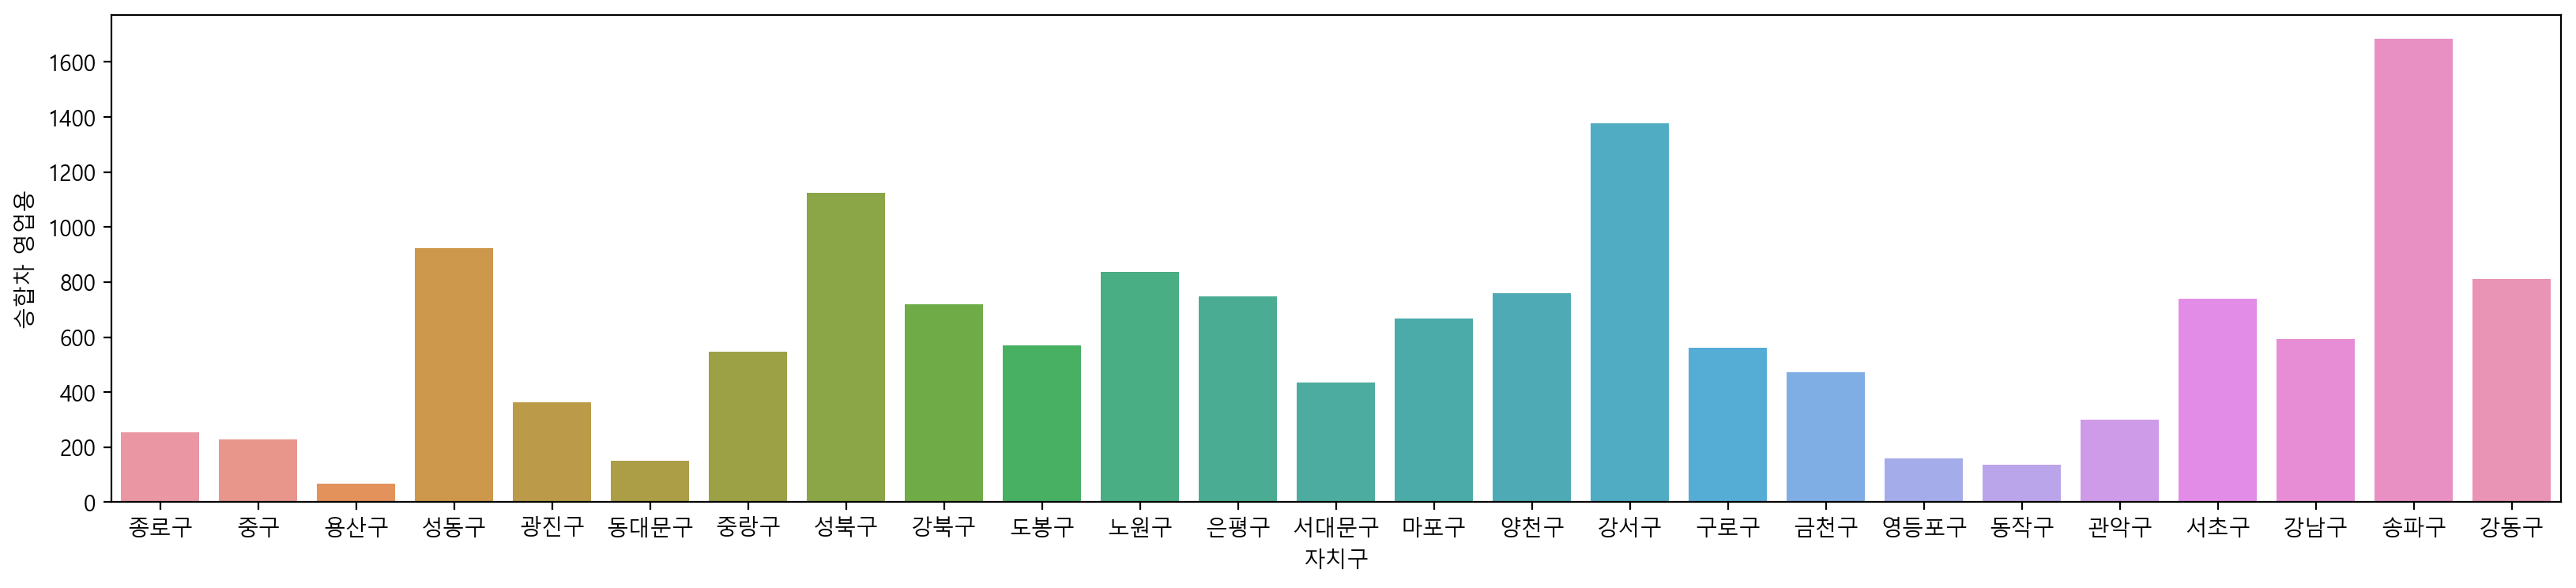

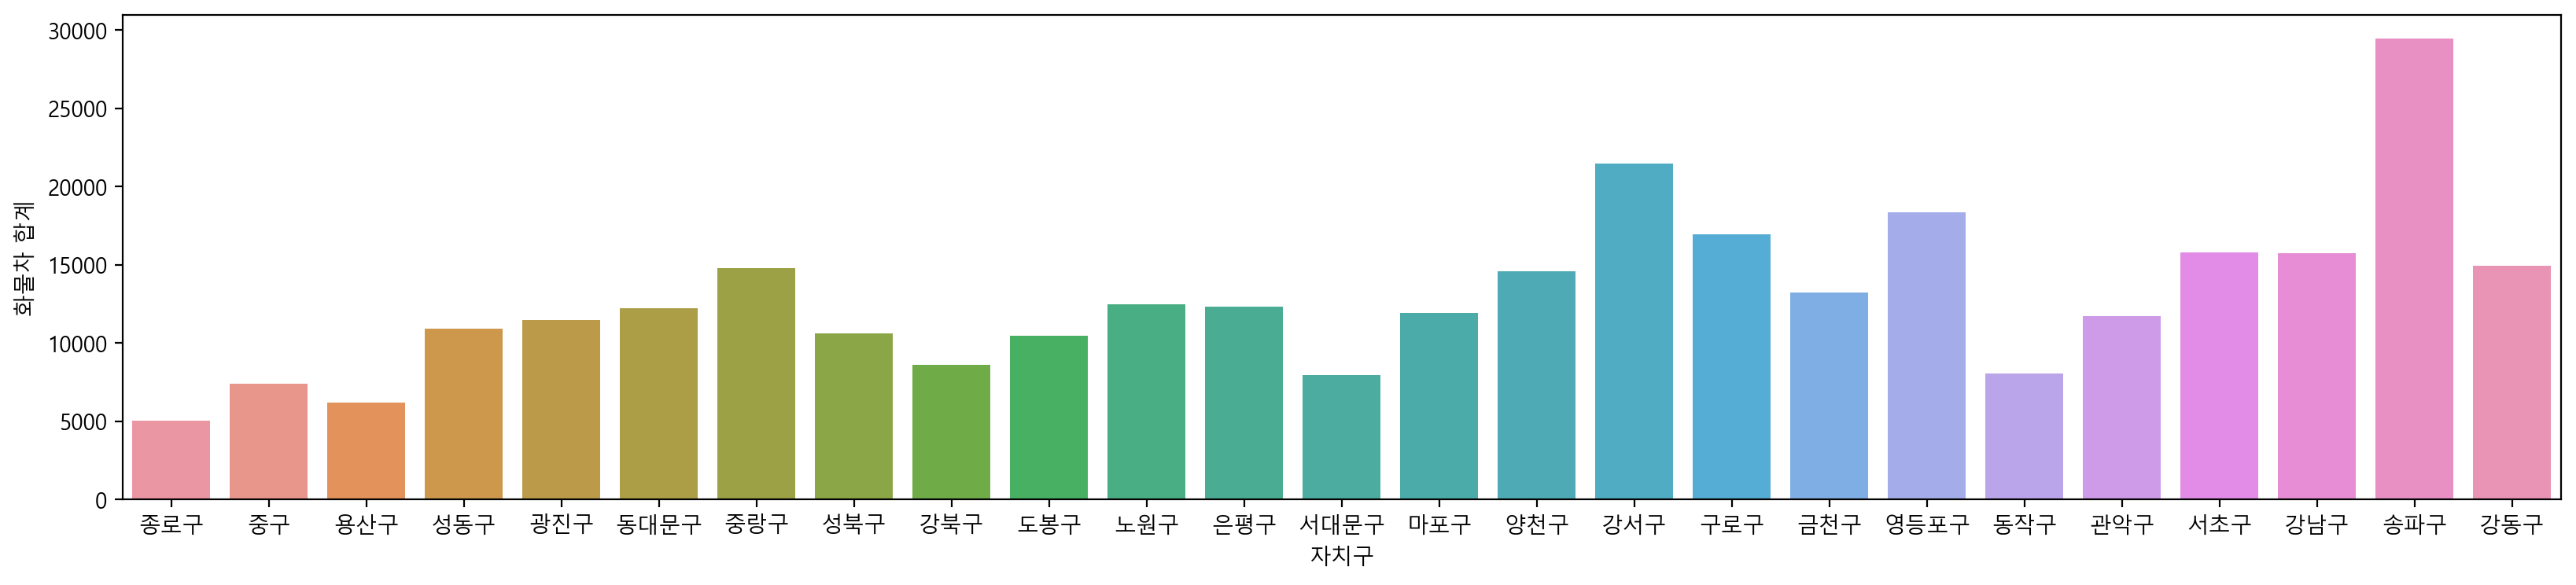

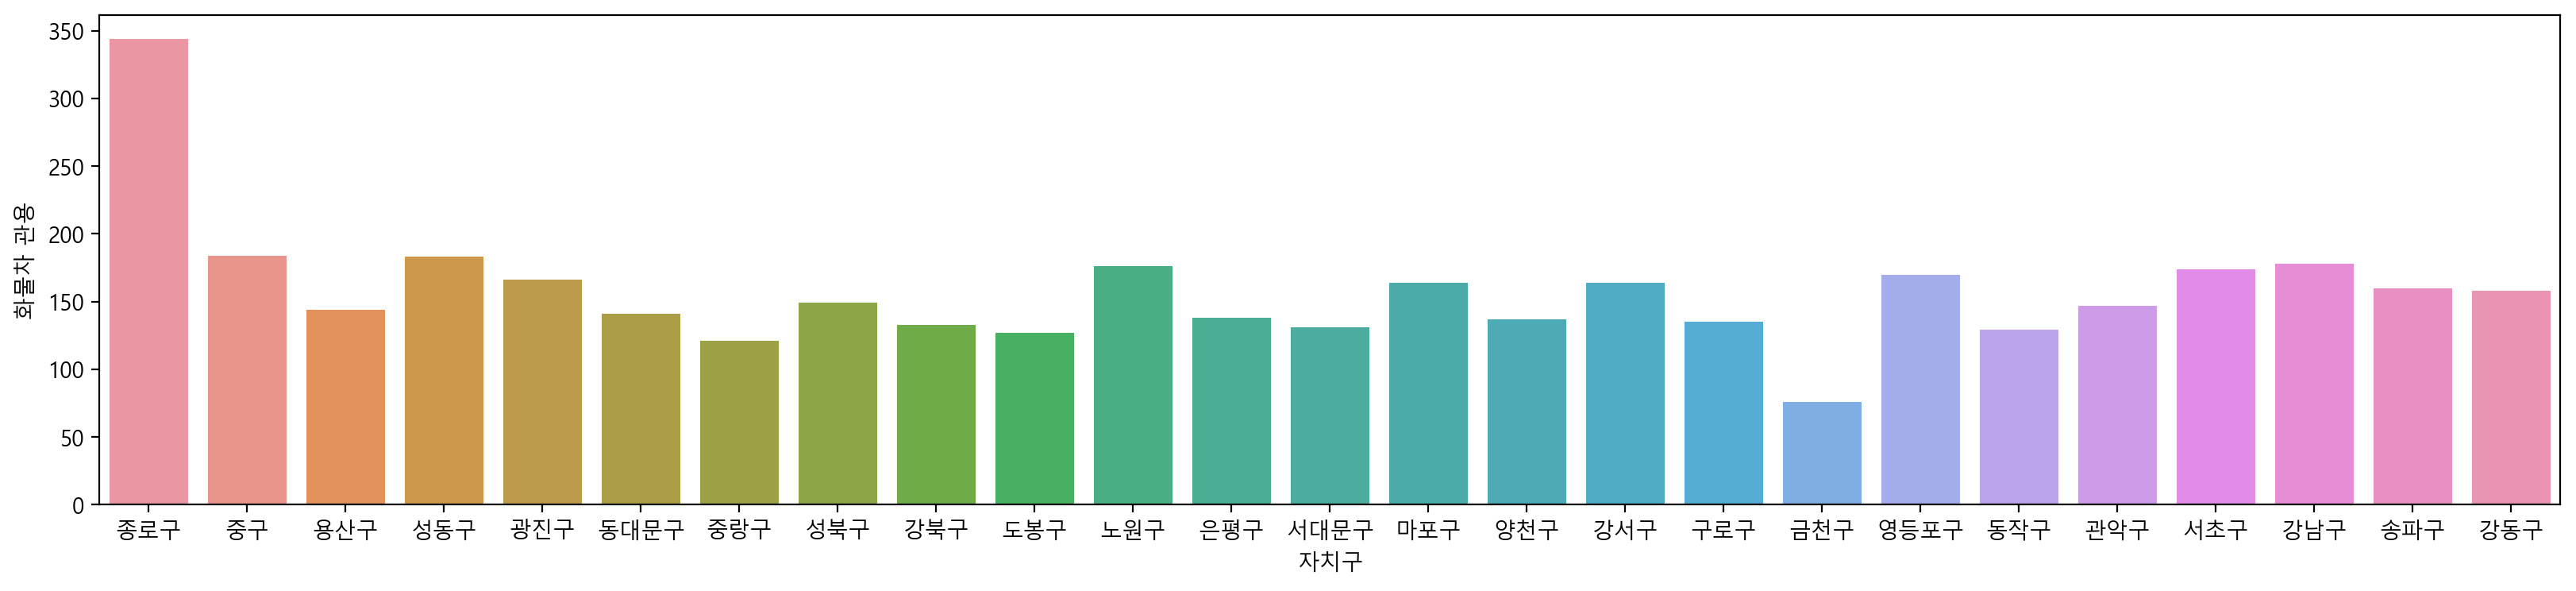

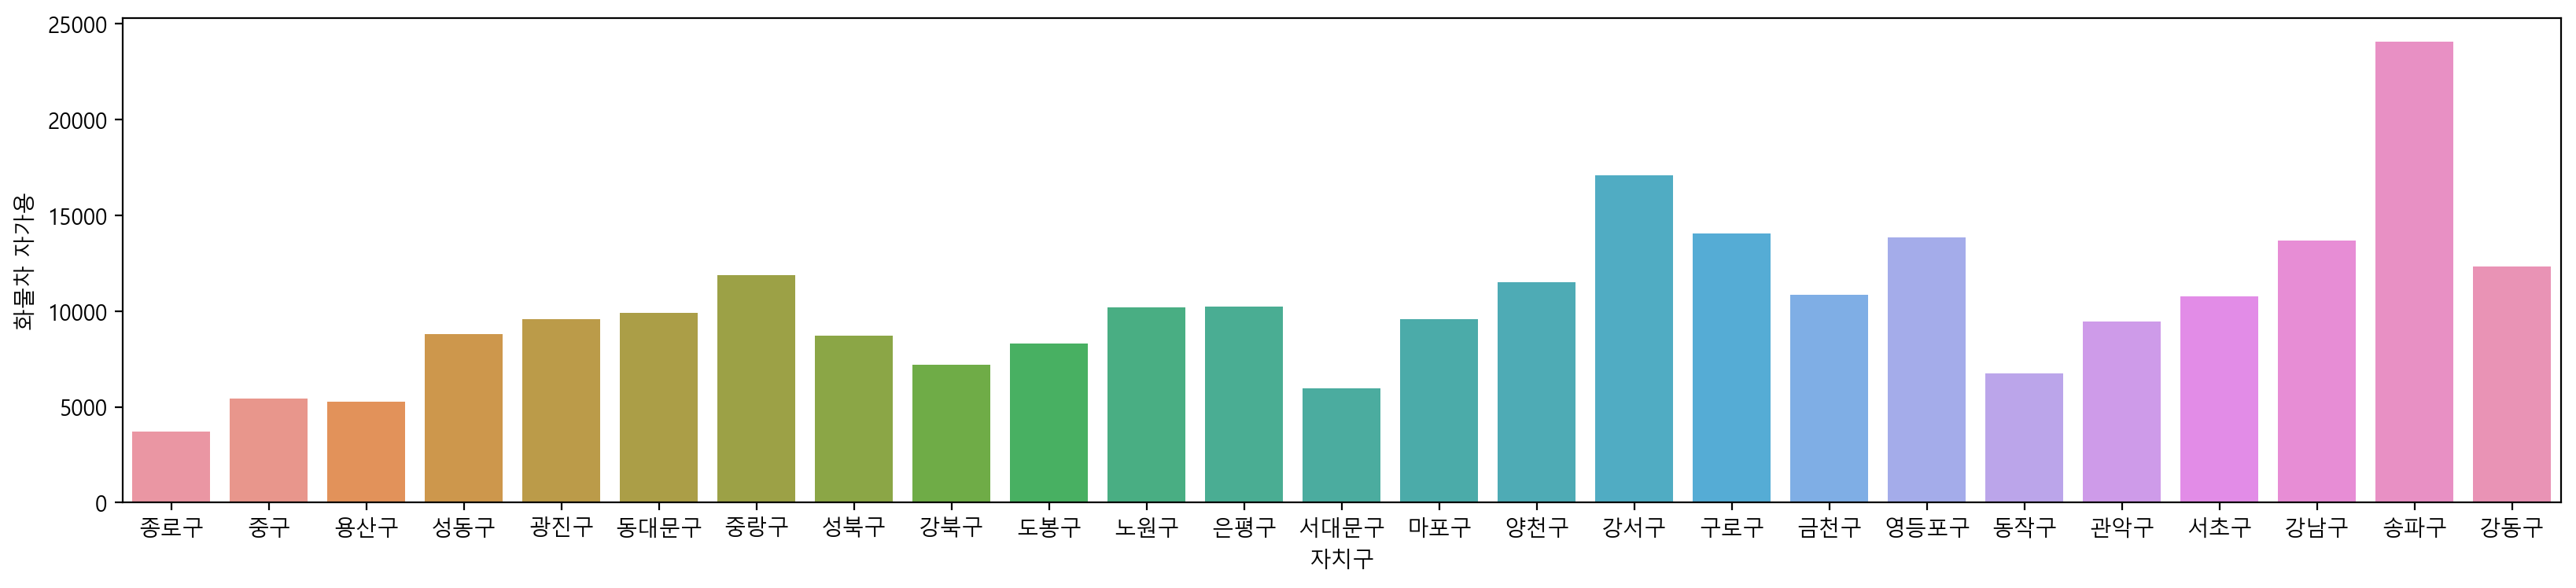

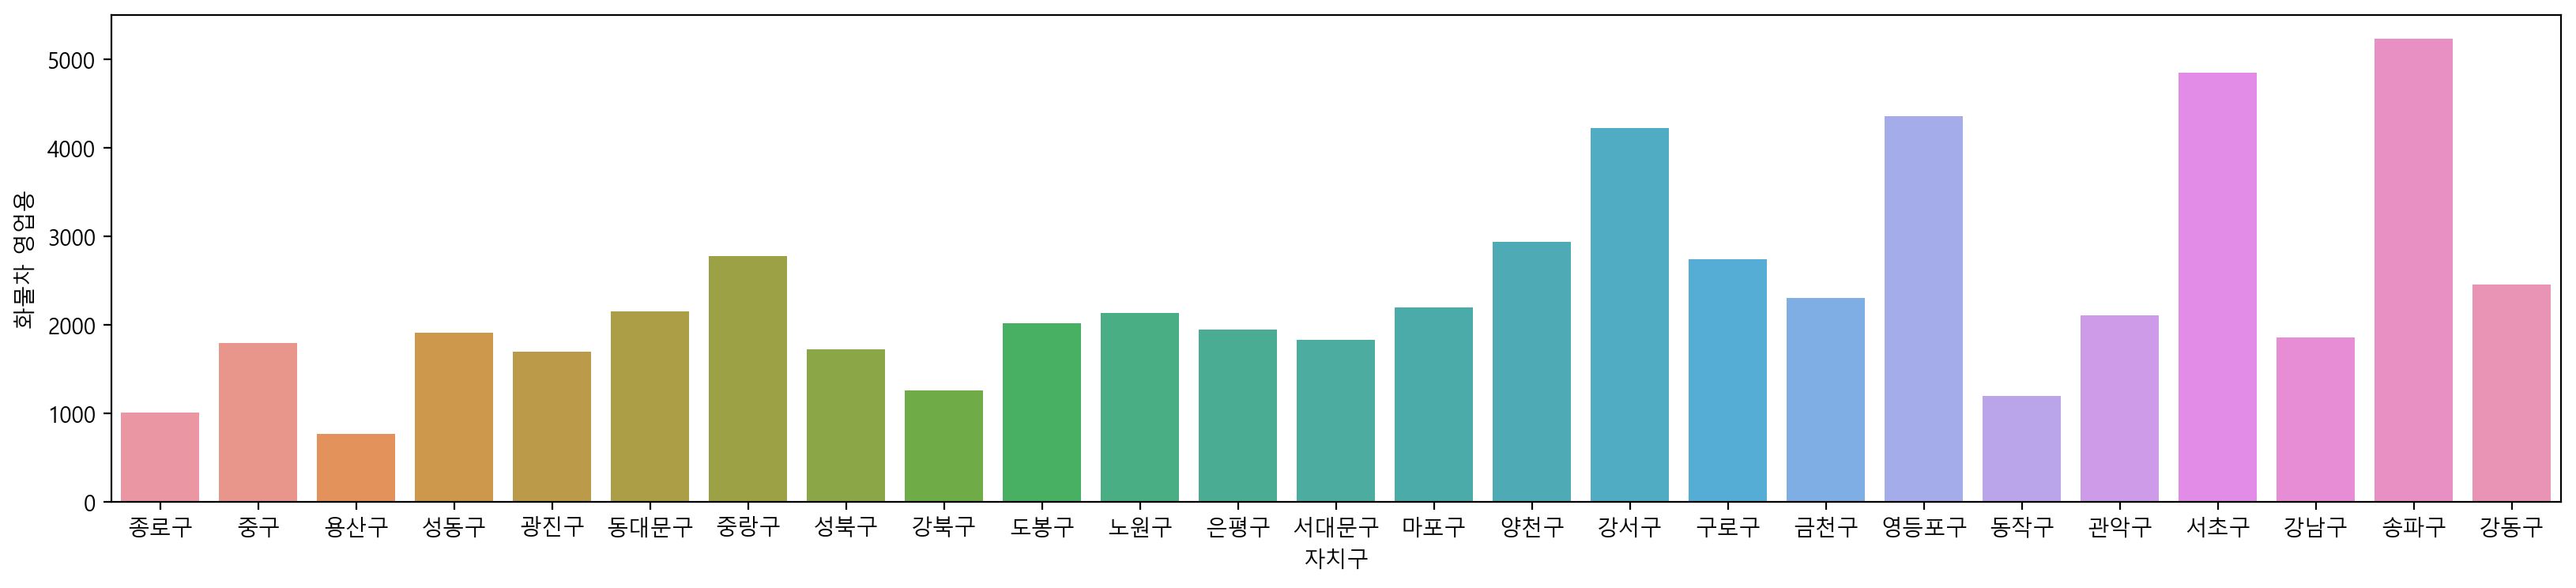

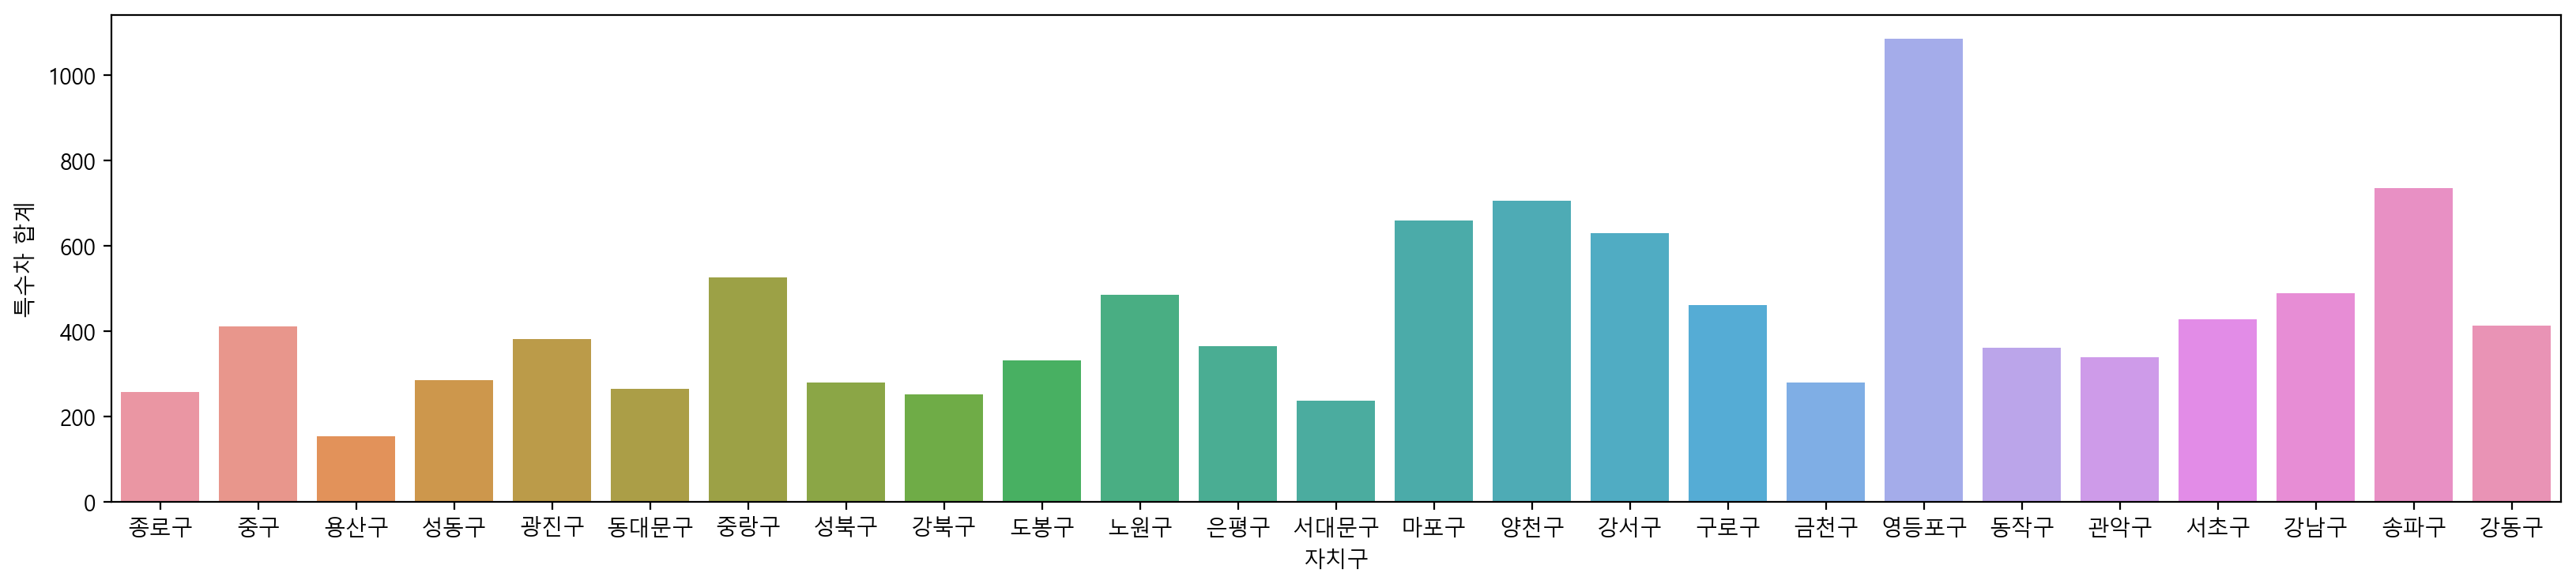

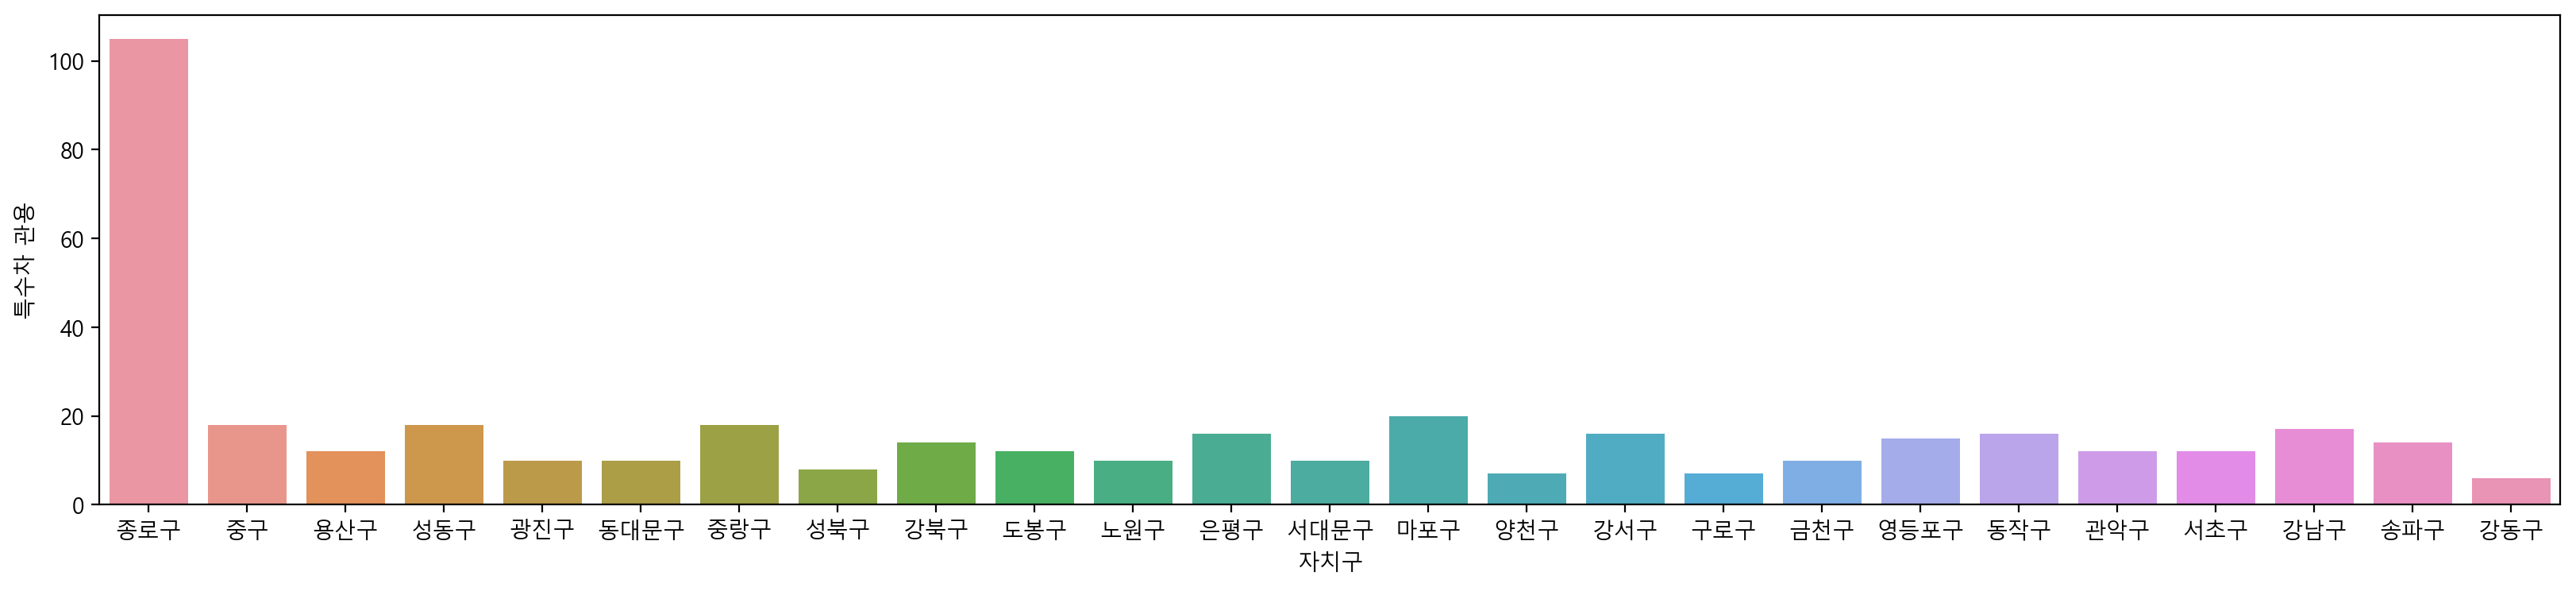

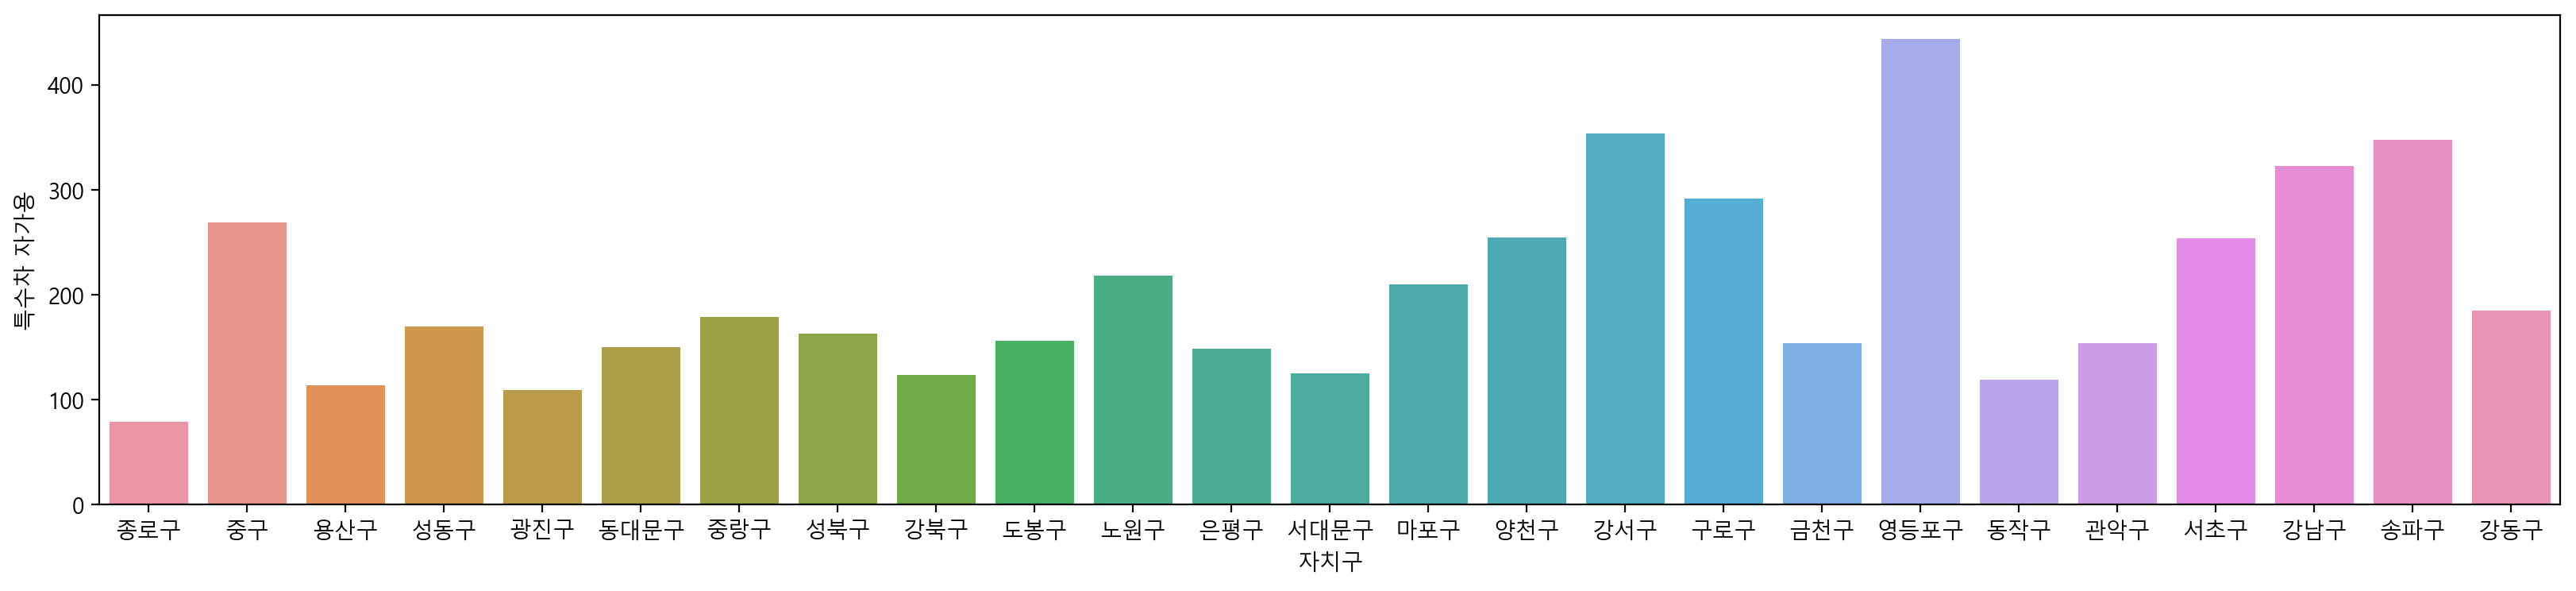

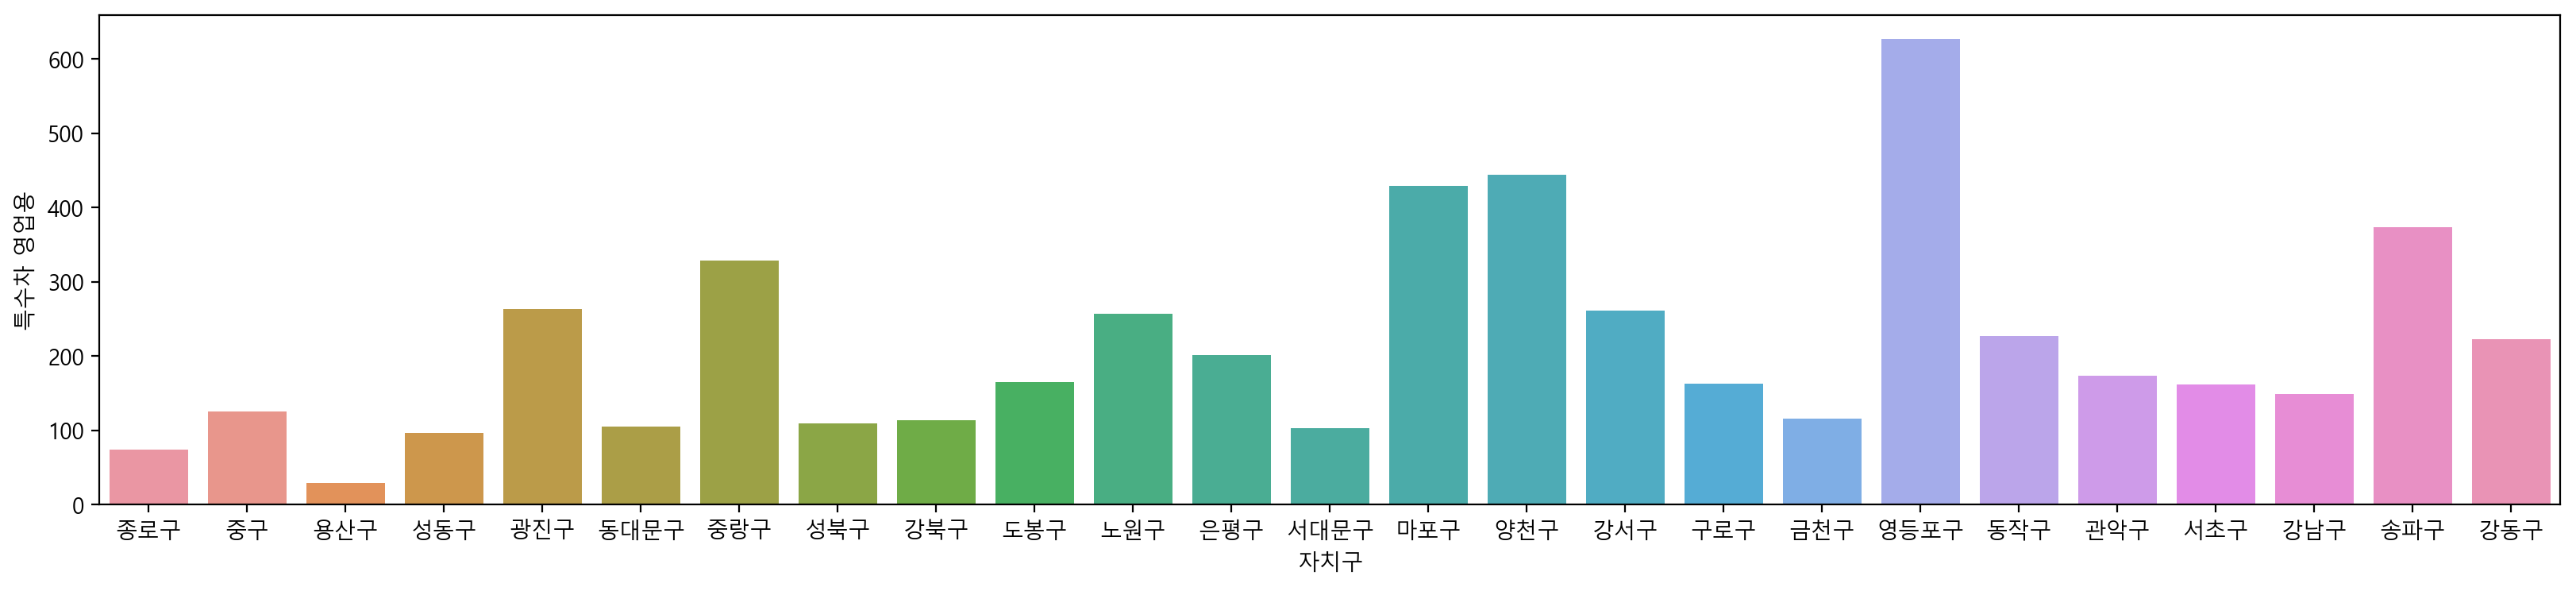

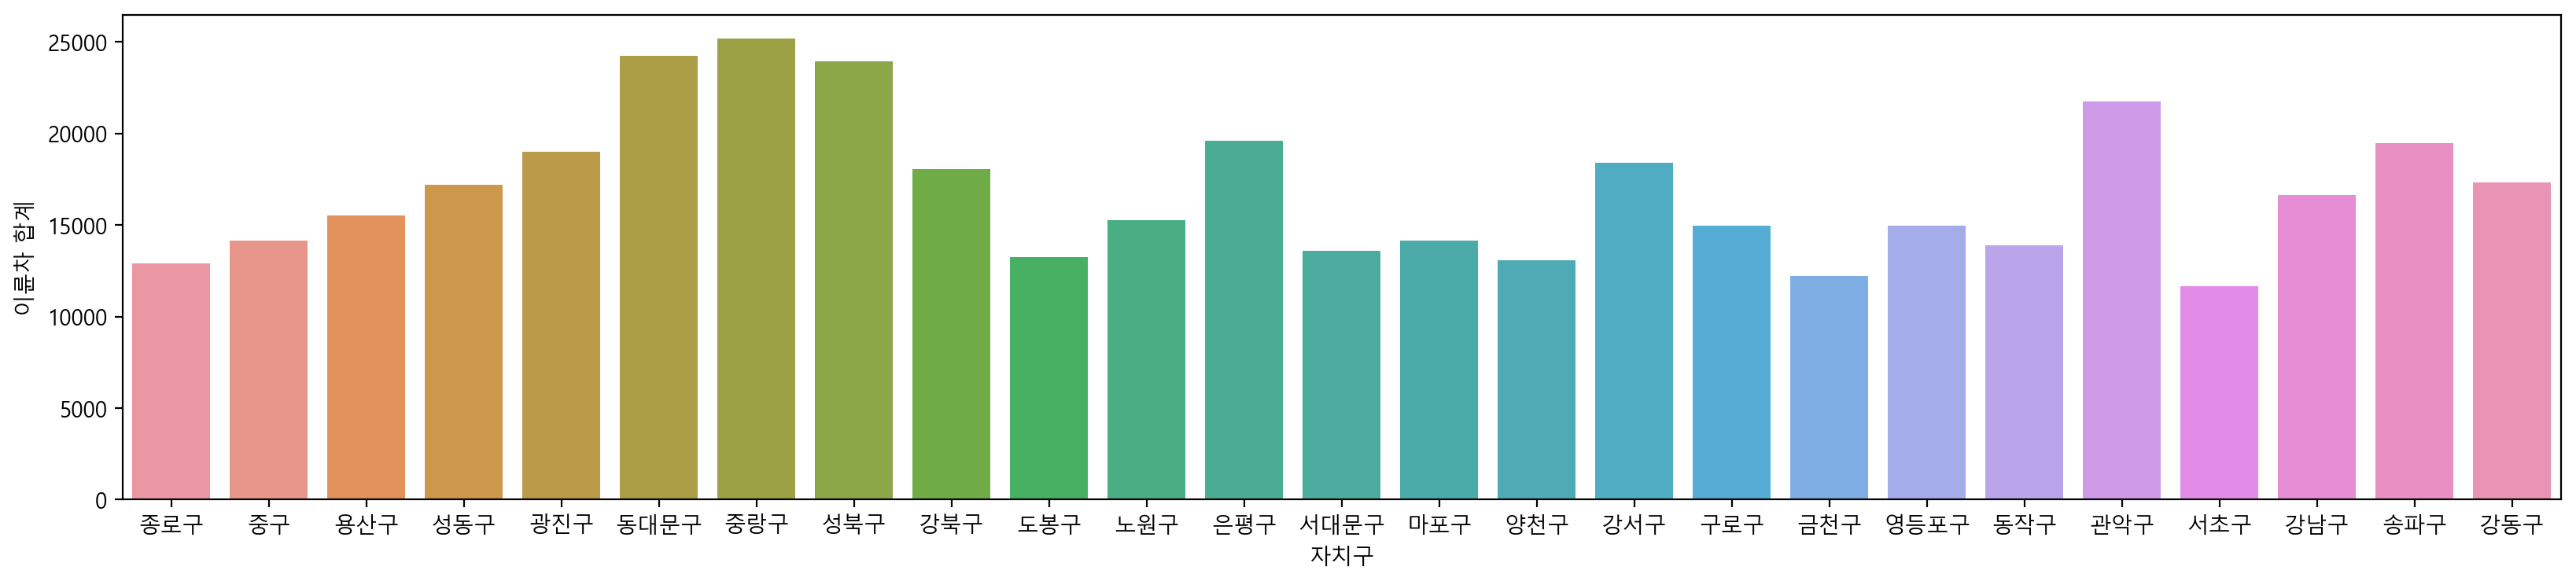

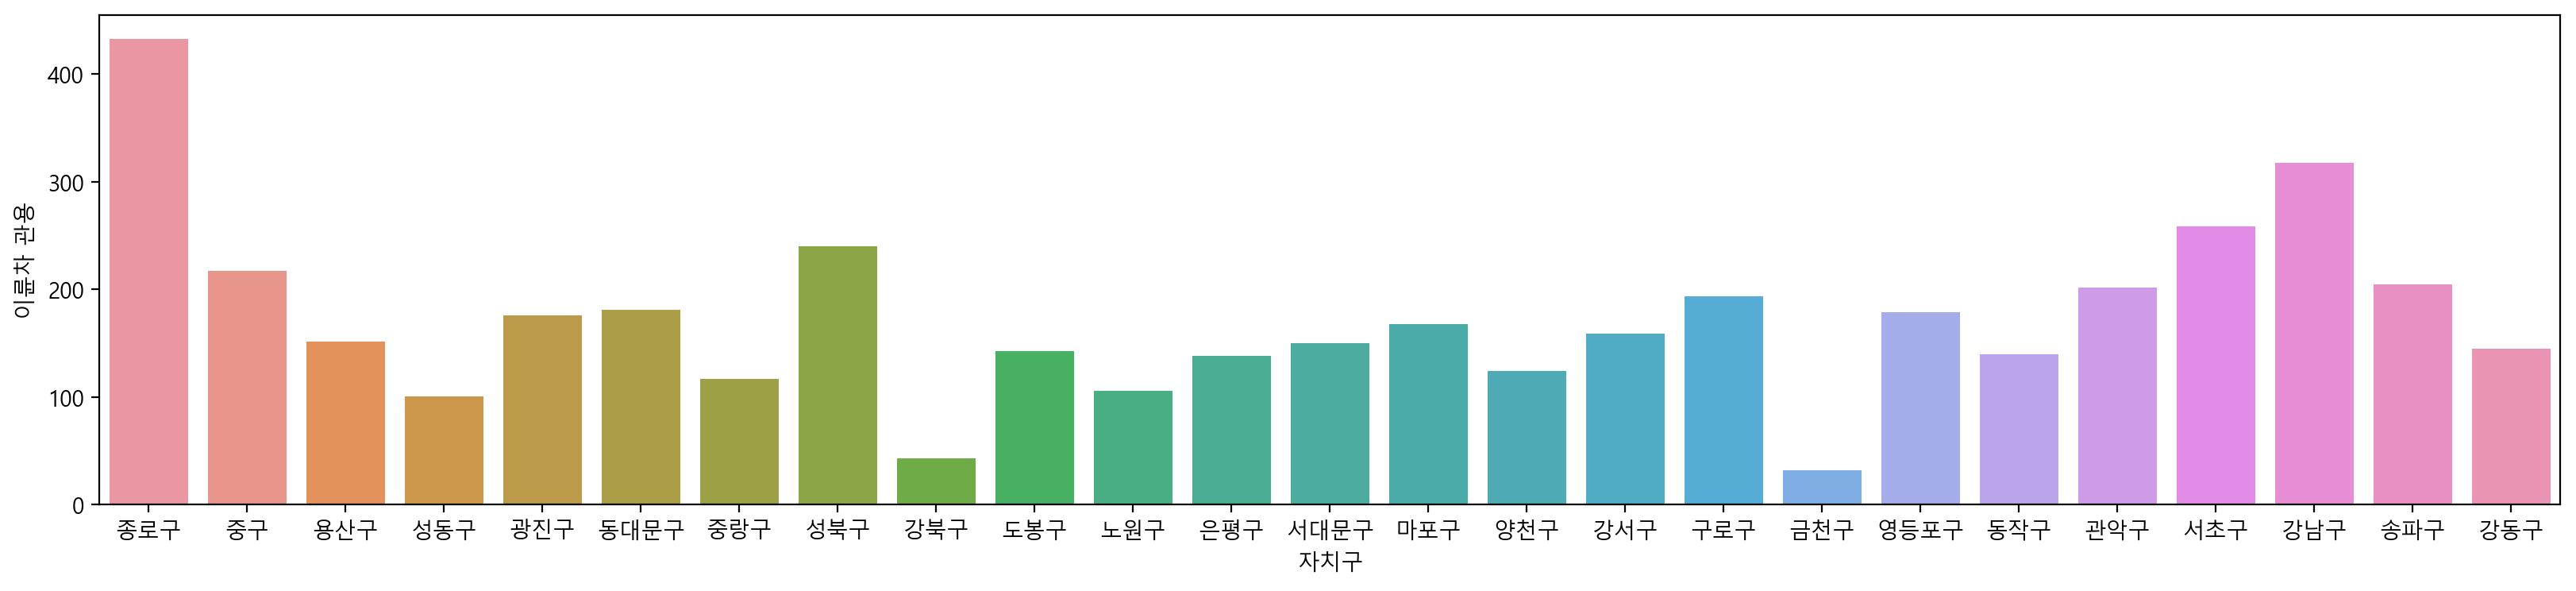

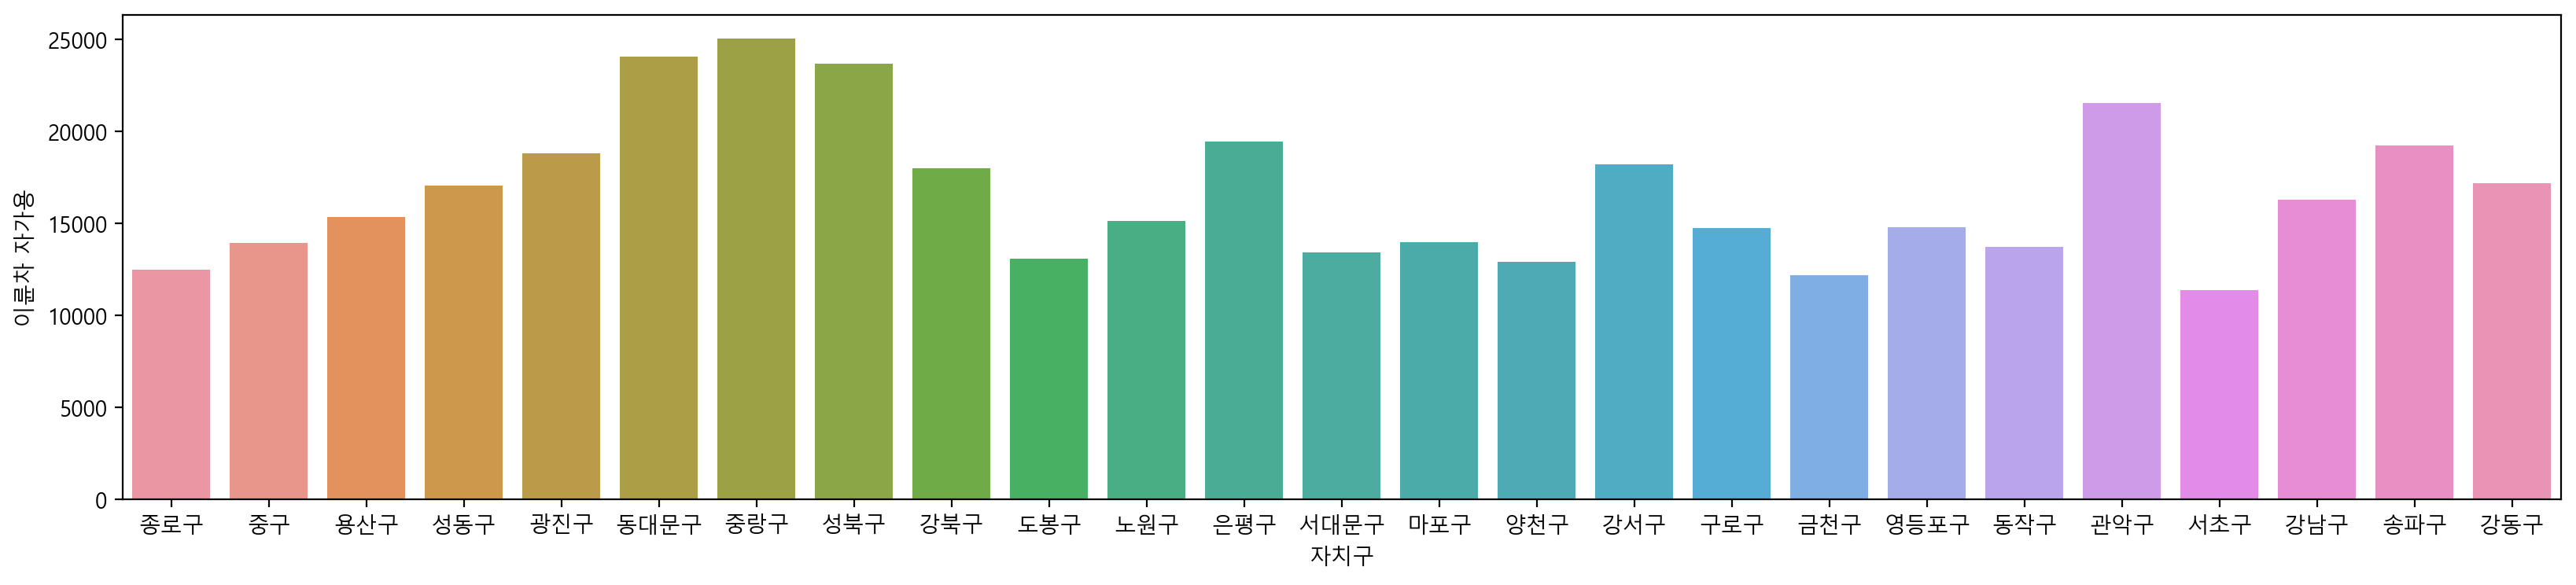

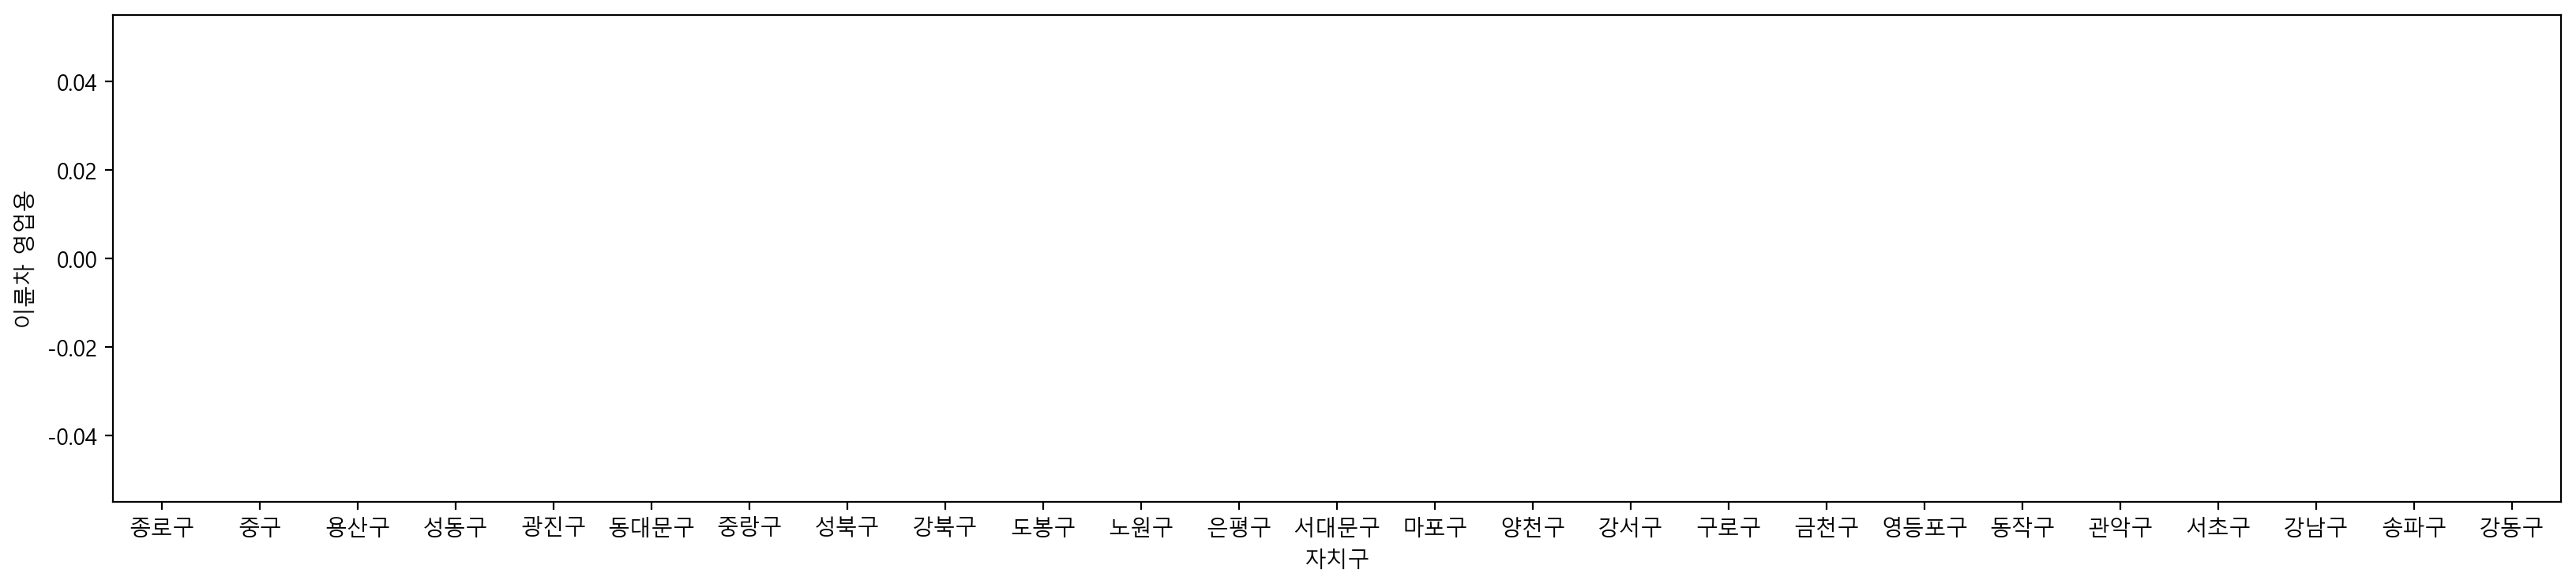

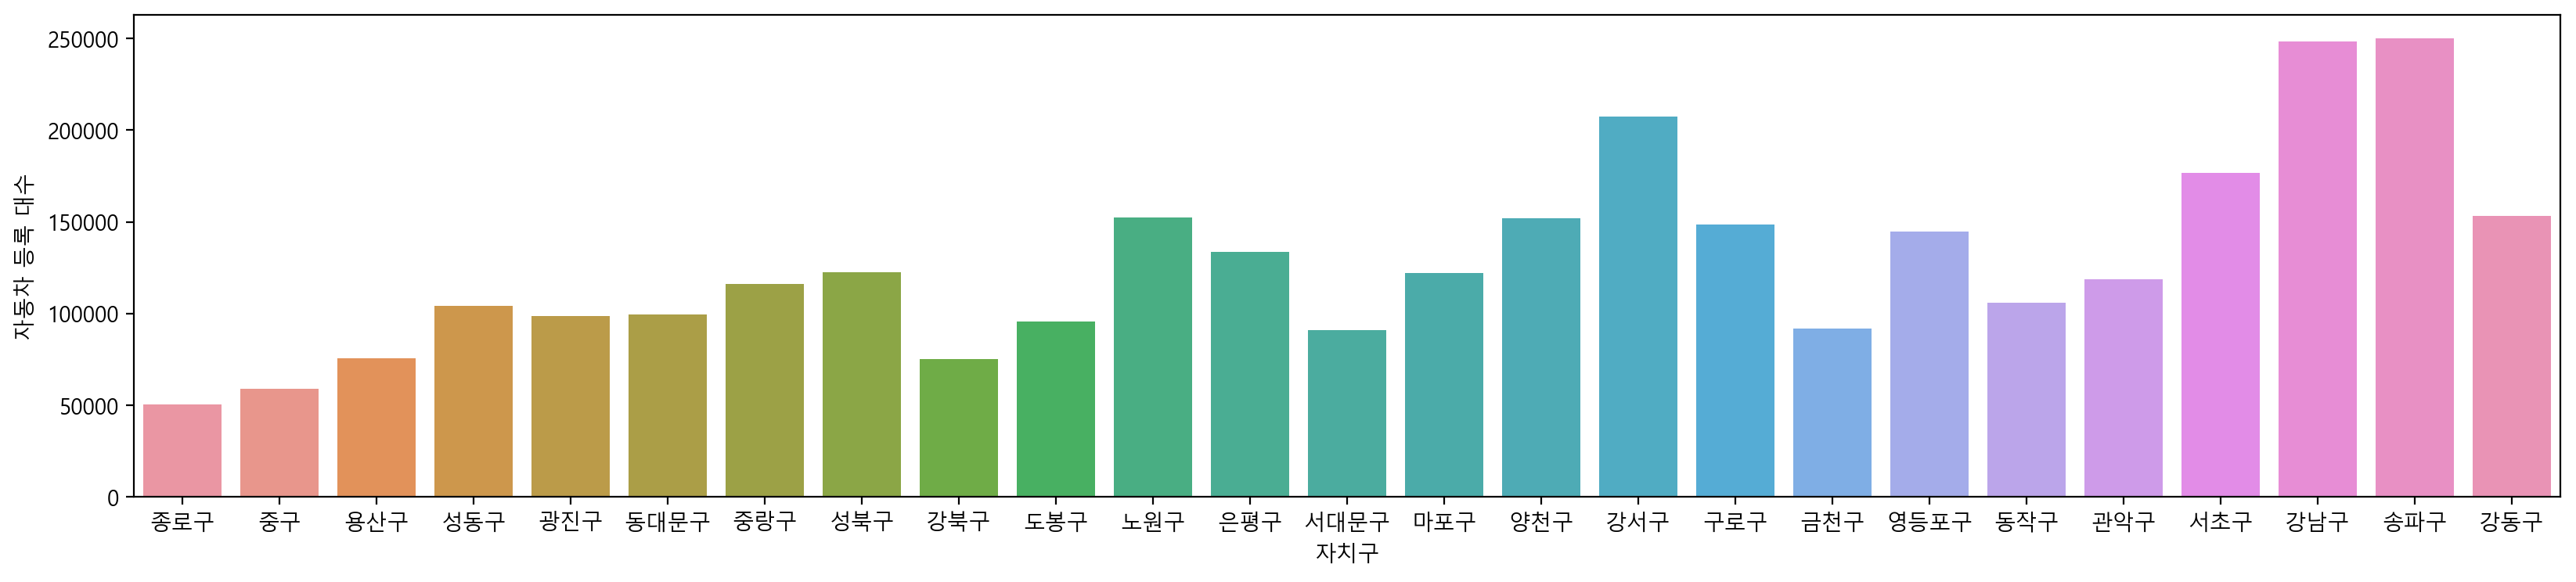

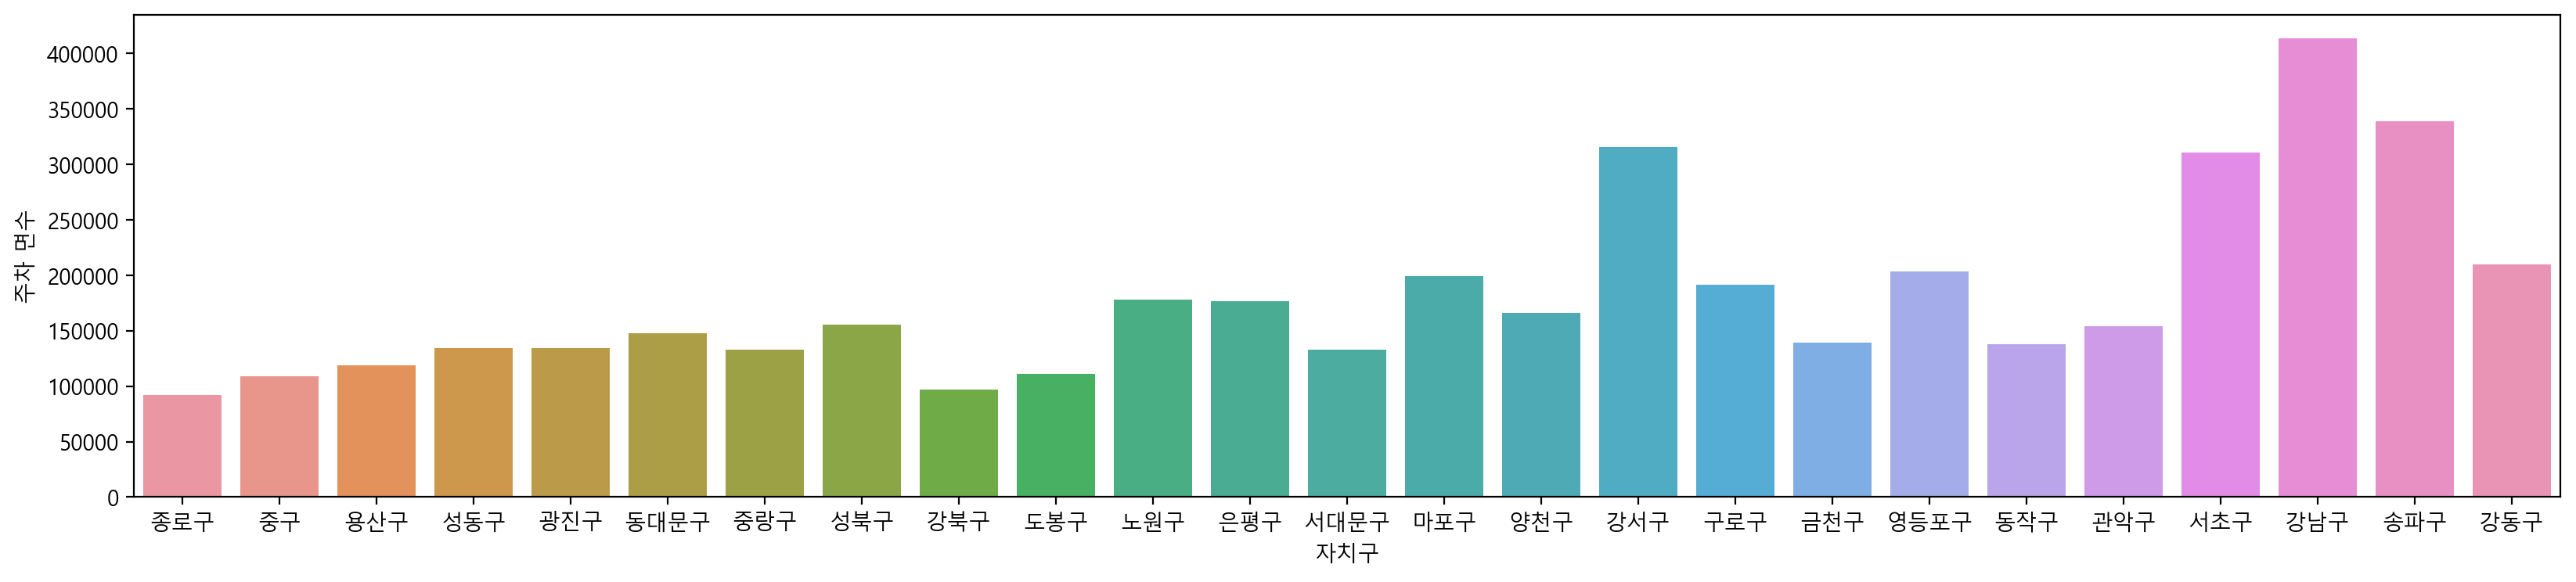

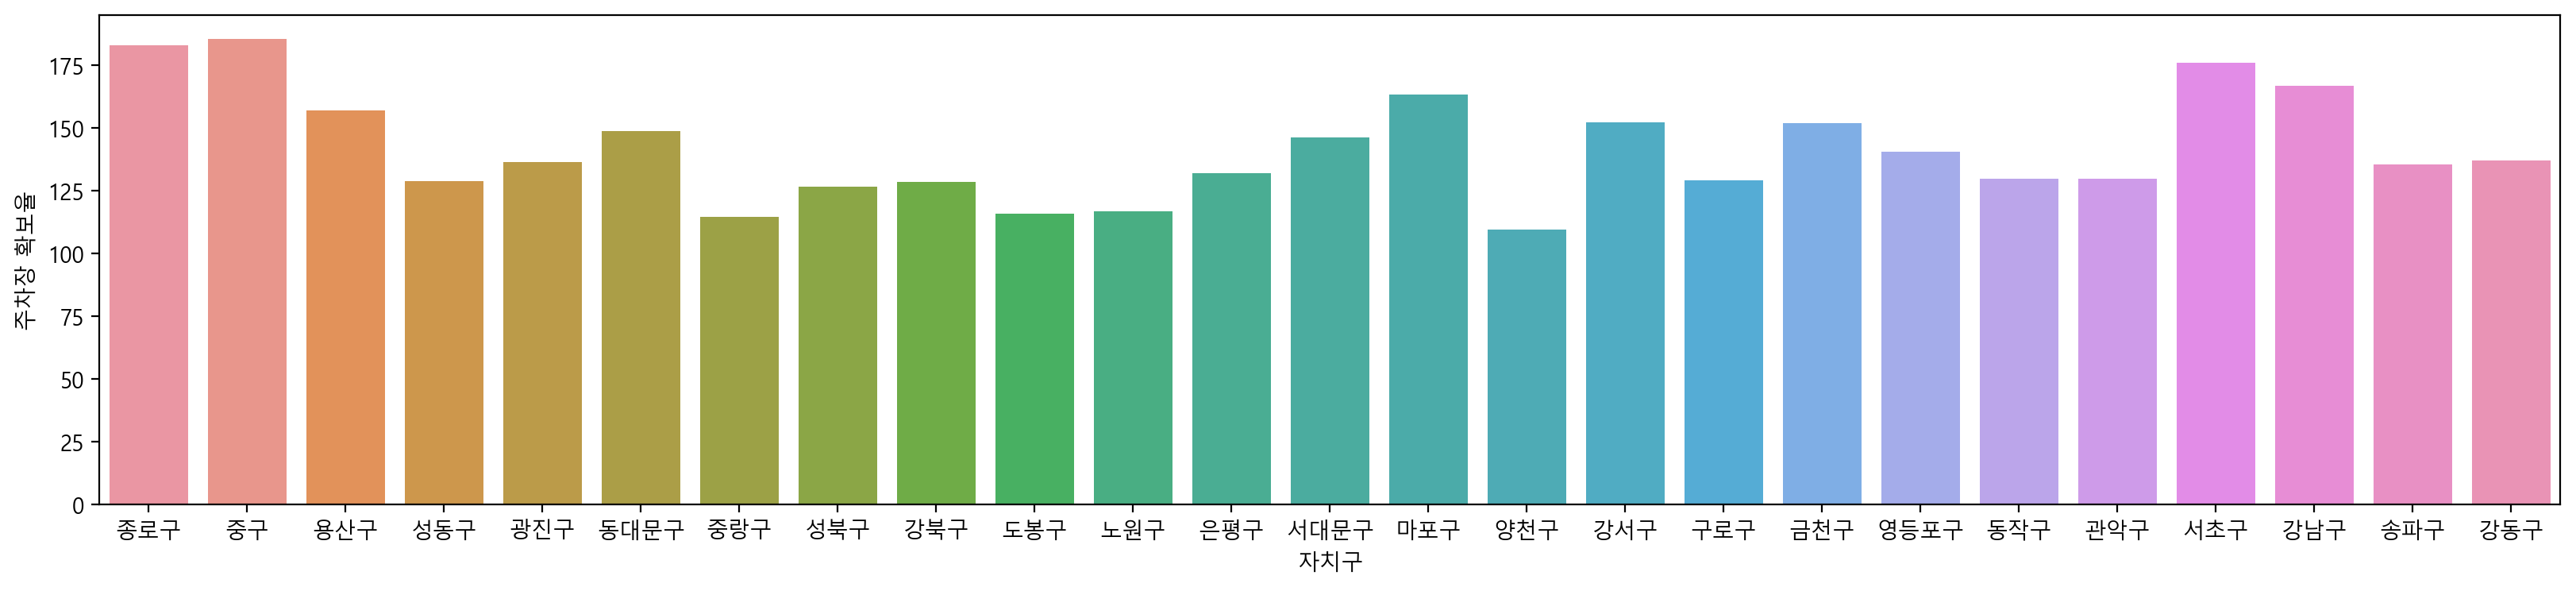

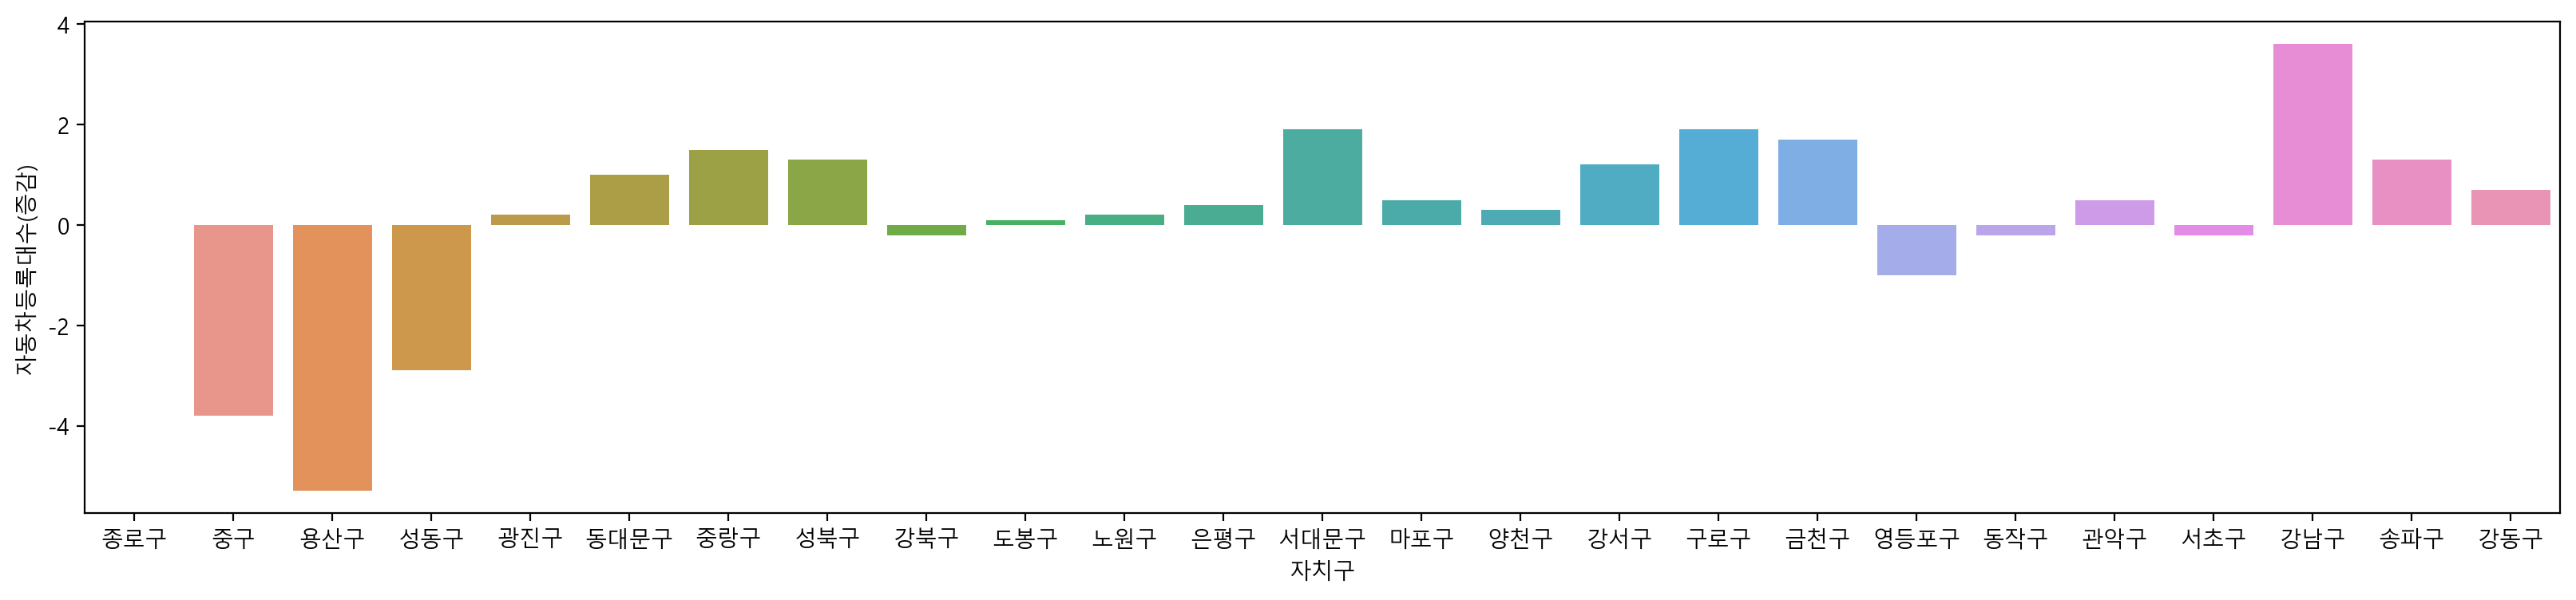

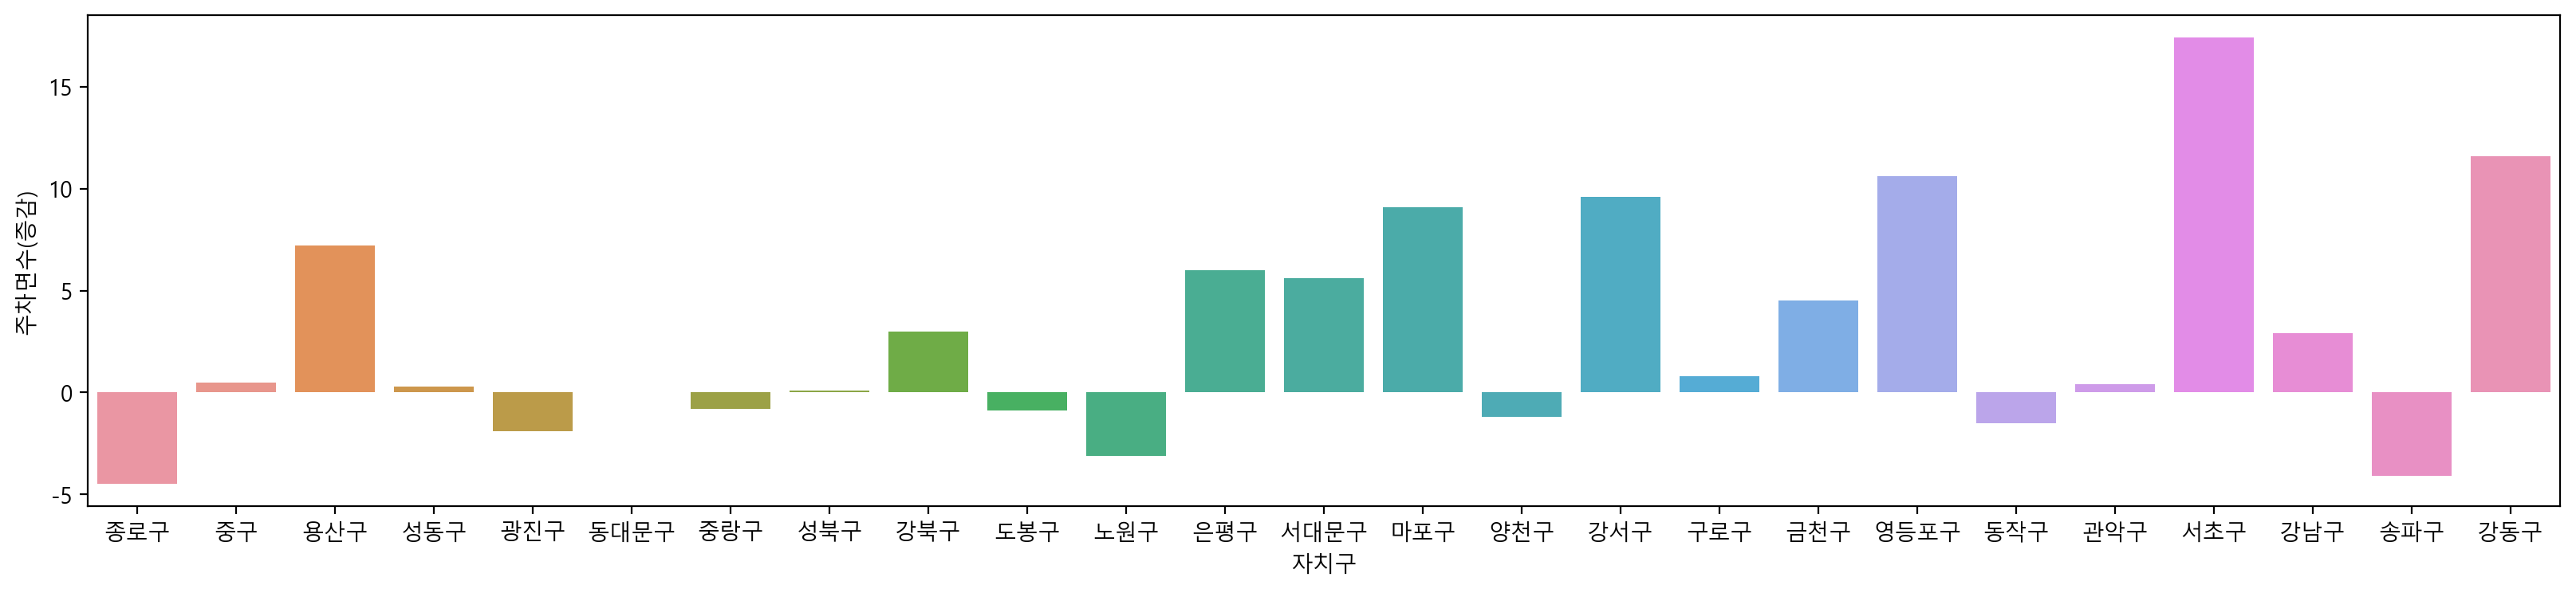

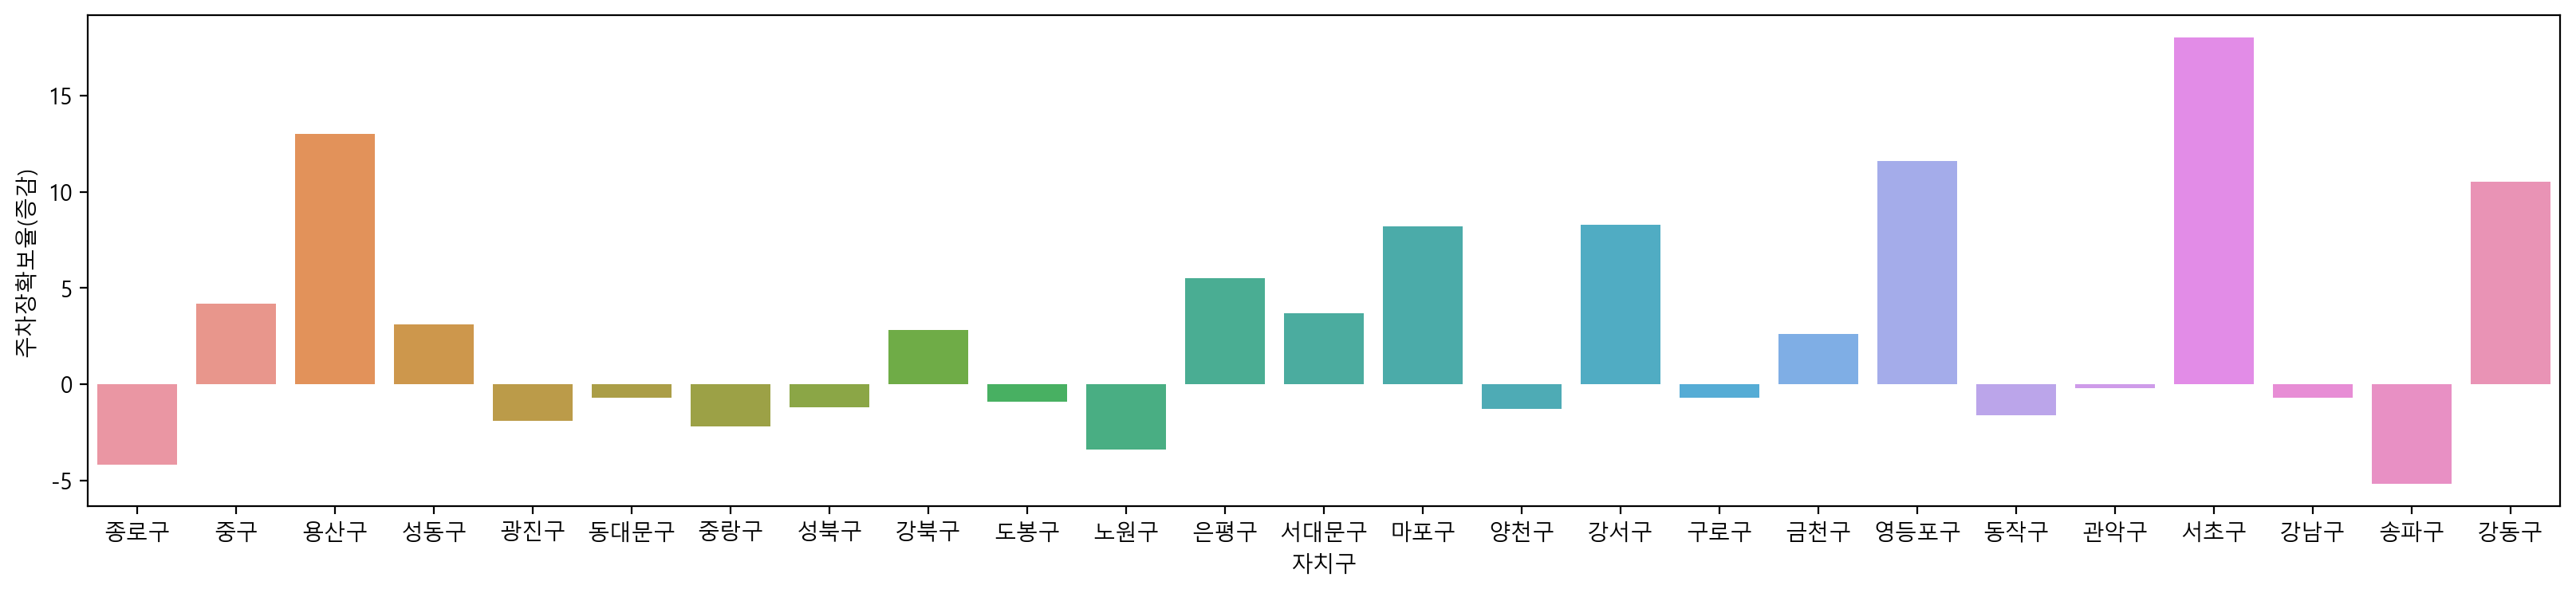

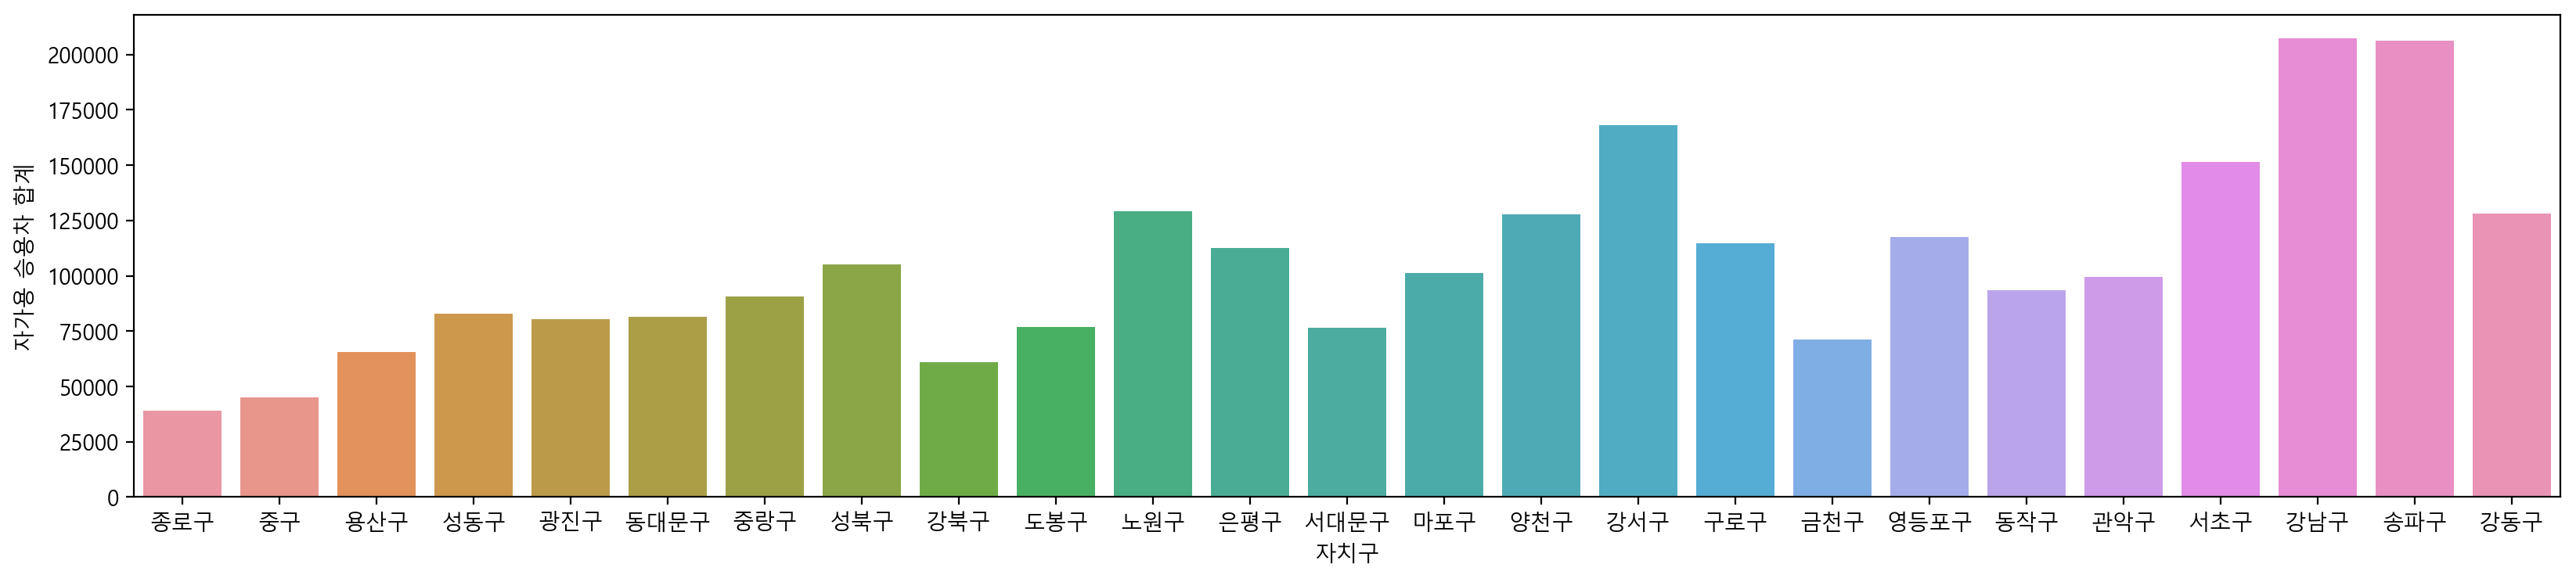

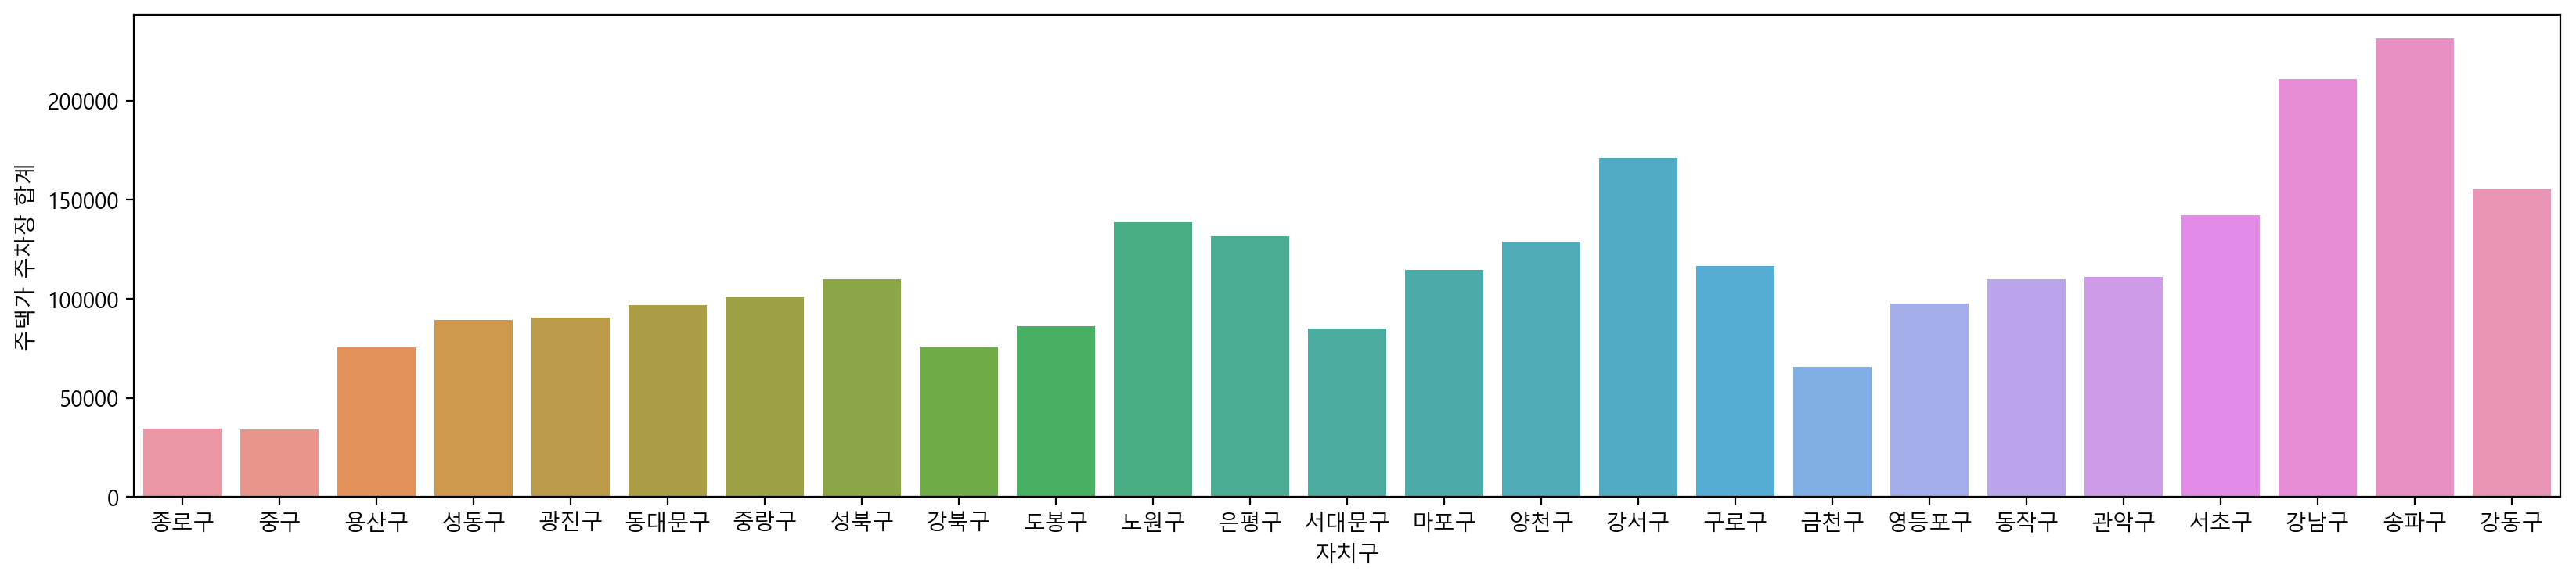

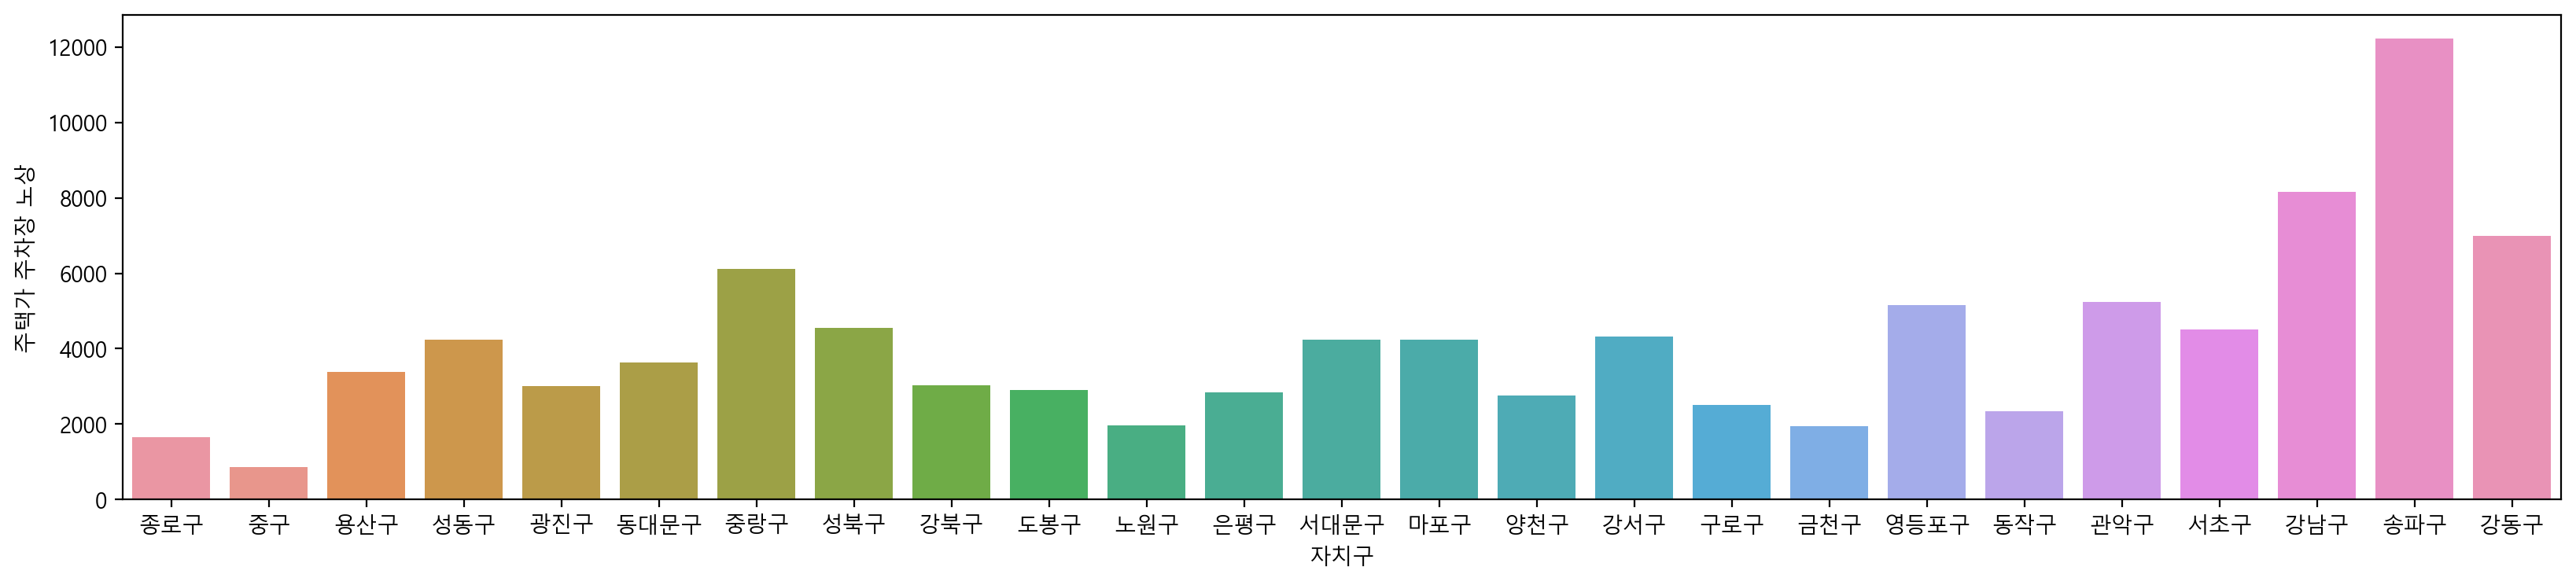

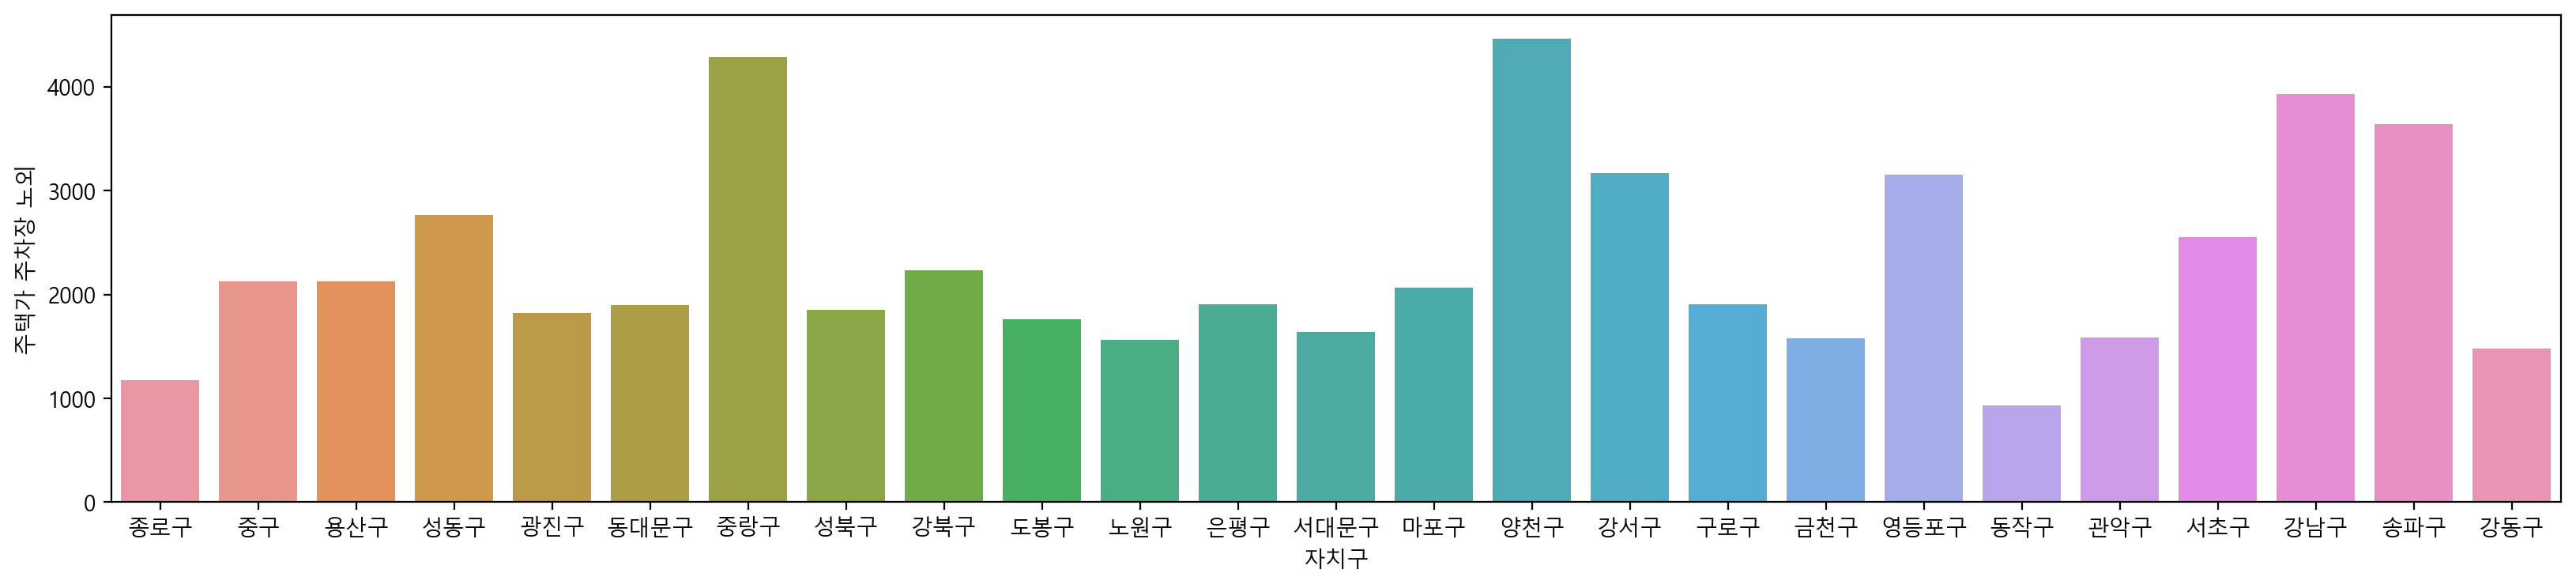

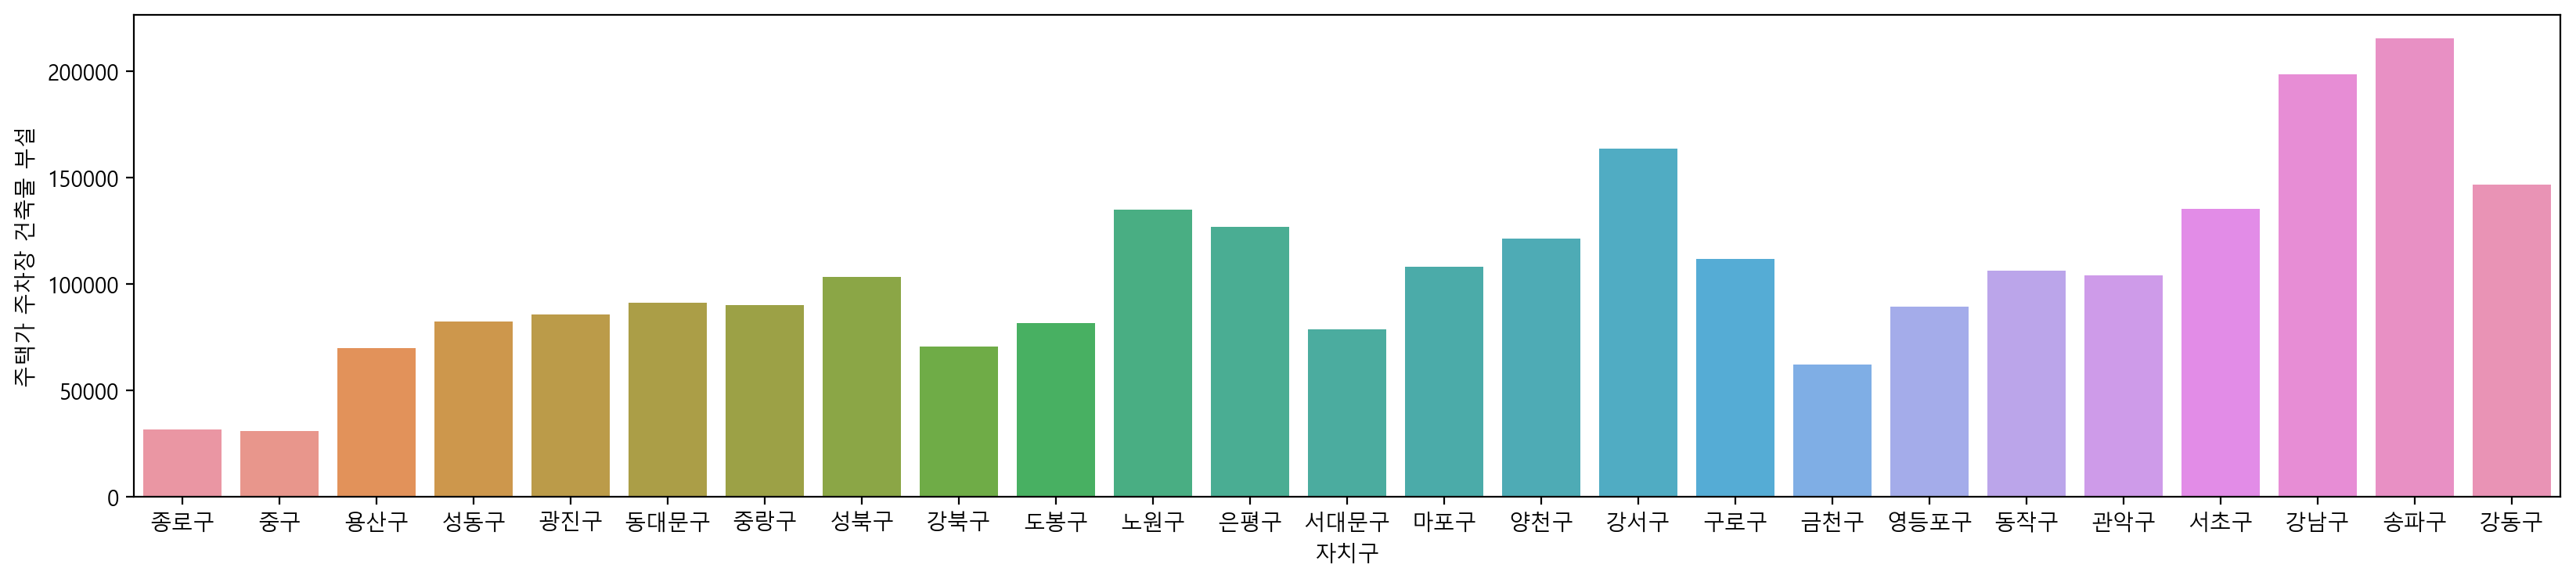

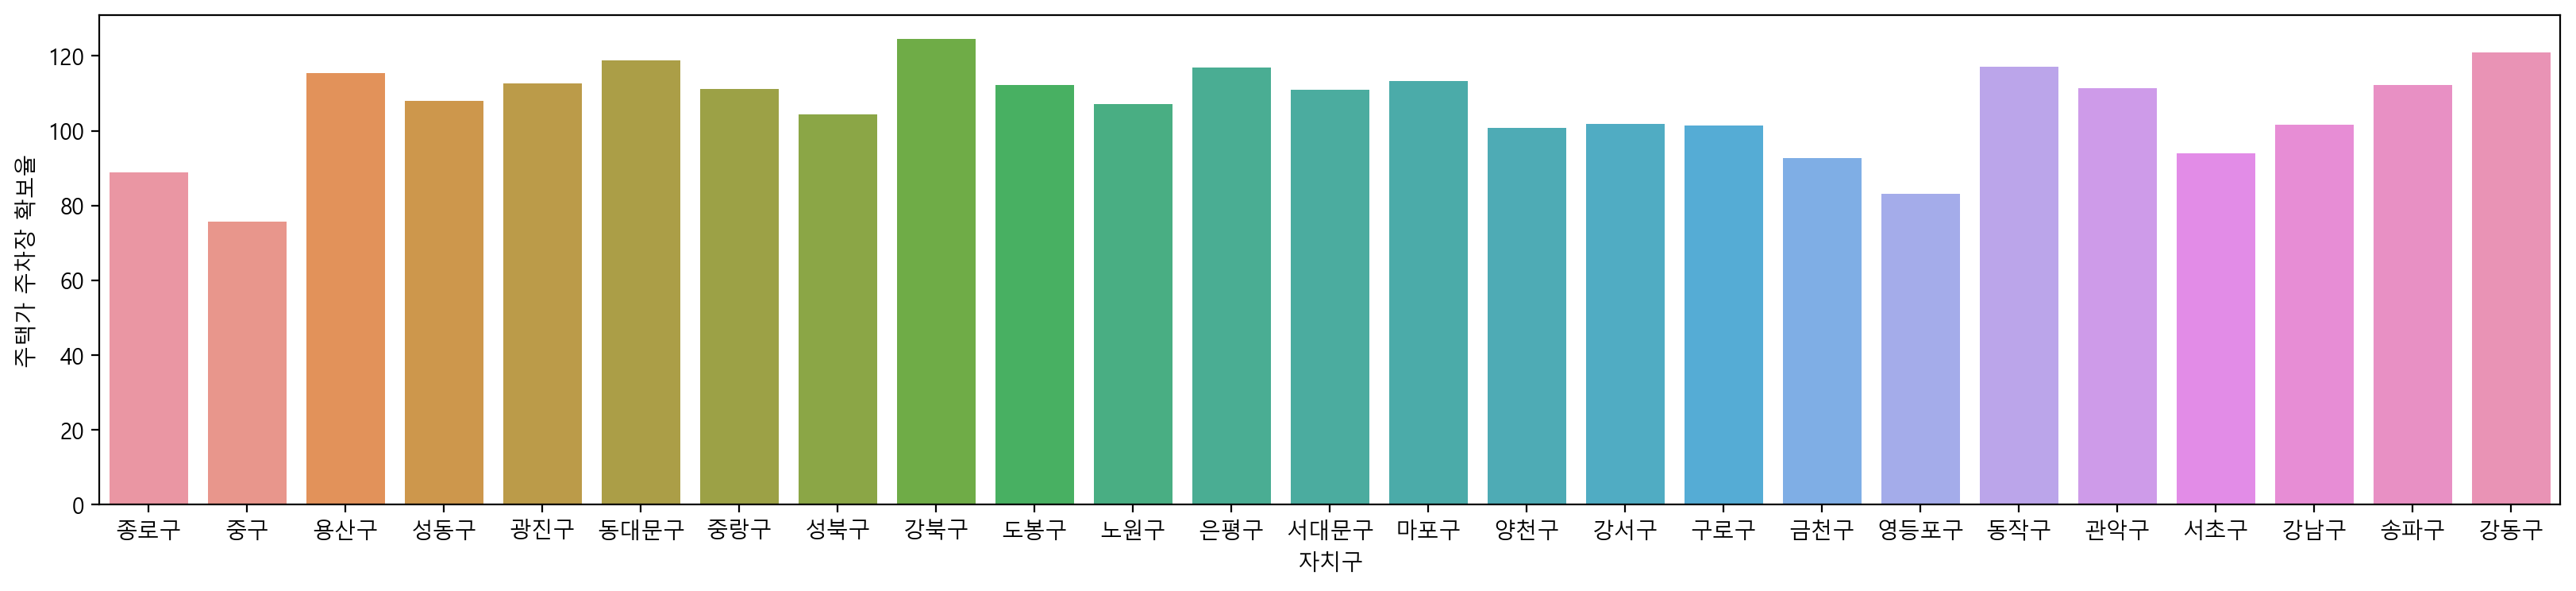

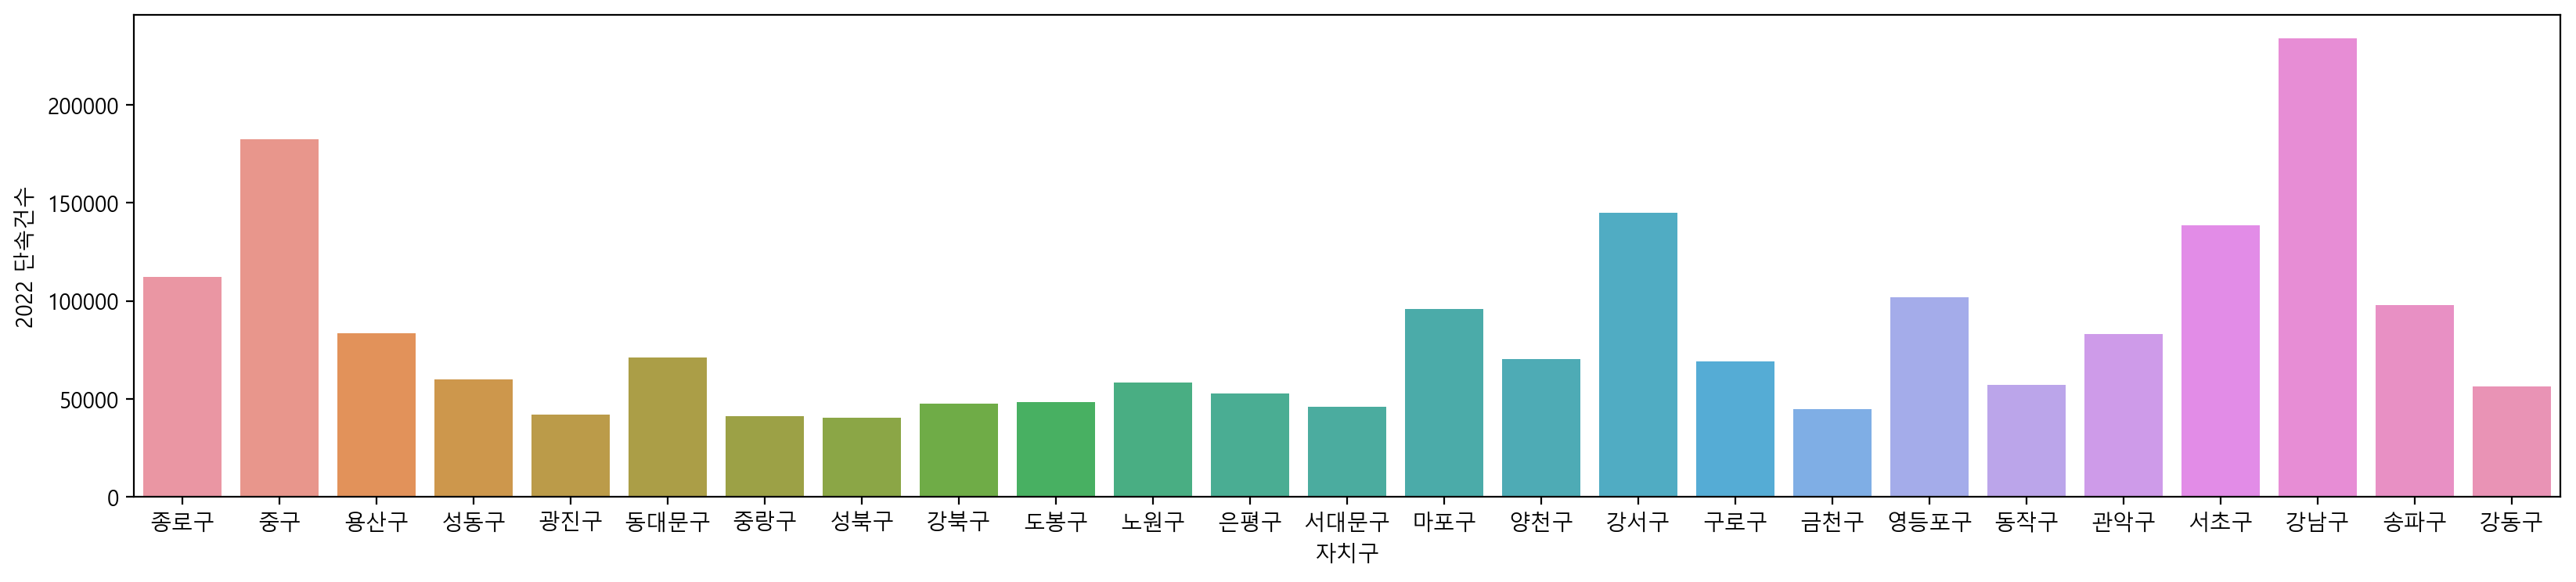

In [108]:
for i in range(1,38):
    plt.figure(figsize=(20,4))
    sns.barplot(x='자치구', y=seoul_car.columns[i], data=seoul_car)
    plt.savefig(f"{'0' * int(2-len(str(i)))}{i} {seoul_car.columns[i]}.png")
    plt.show

### 불법주차(2017~2022)

In [76]:
seoul_illegal = pd.read_csv('C:/Users/User/Desktop/강서구 빅데이터 공모전/[구별] 서울 자치구별 불법주정차 단속(2017~2022).csv', encoding='cp949', thousands=',')
seoul_illegal.columns = ['자치구명', '2017 단속건수', '2018 단속건수', '2019 단속건수', '2020 단속건수', '2021 단속건수', '2022 단속건수']
seoul_illegal = seoul_illegal.loc[2:].reset_index(drop=True)
seoul_illegal = seoul_illegal.drop(['2017 단속건수', '2018 단속건수'], axis=1)
seoul_illegal = seoul_illegal.set_index(keys='자치구명', drop=True).sort_values(by='2022 단속건수', ascending=False)

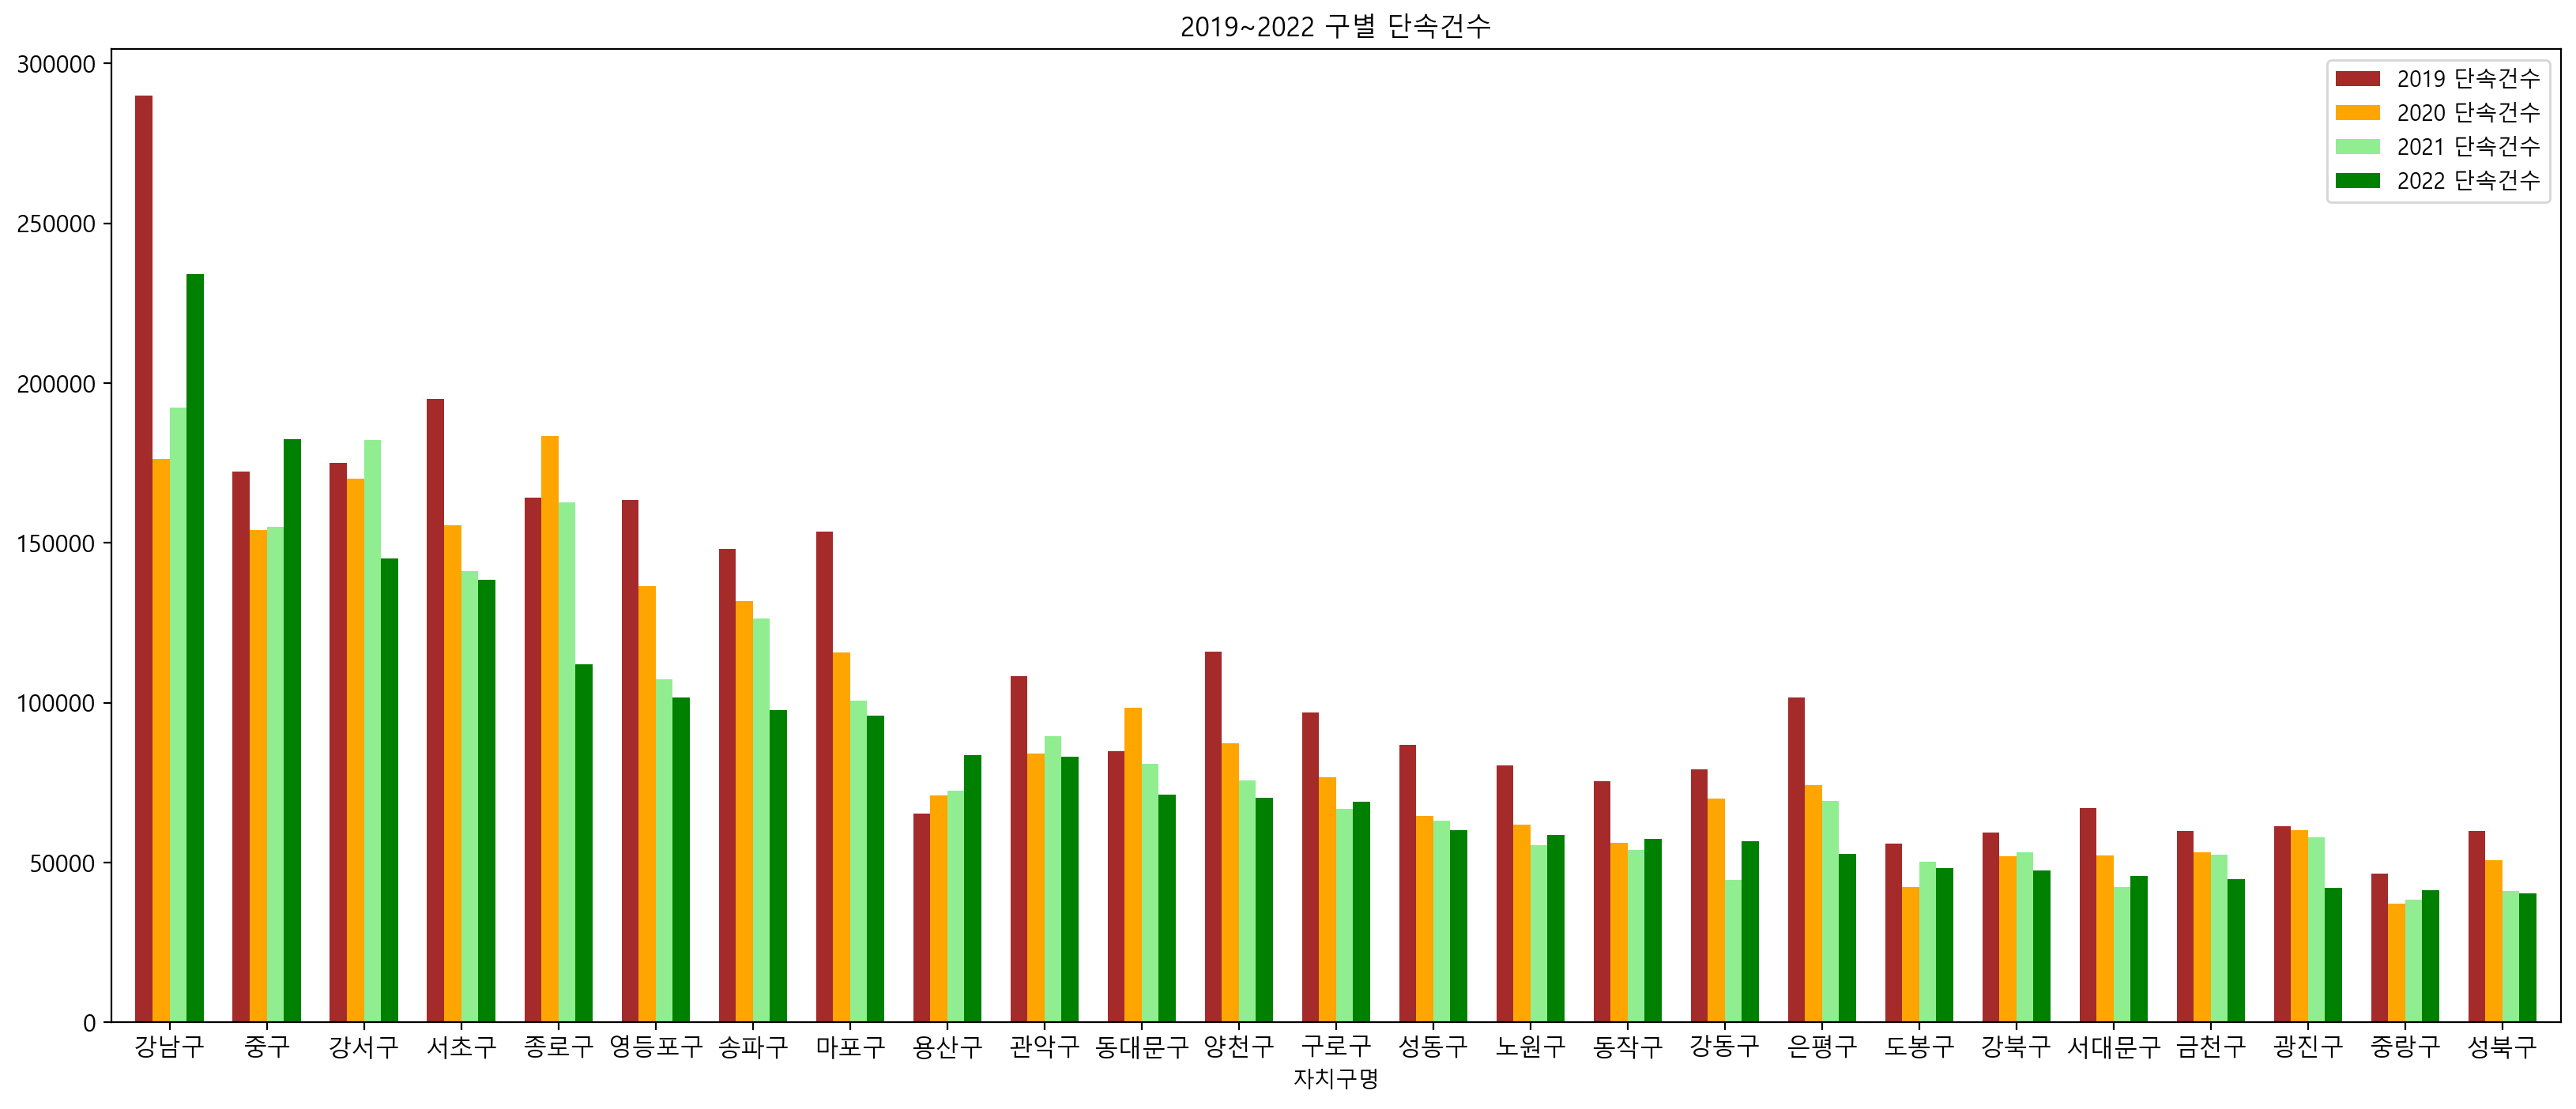

In [102]:
seoul_illegal.plot(kind='bar', figsize=(20,8), width=0.7, rot=0, fontsize=11, color=['brown', 'orange', 'lightgreen', 'green'], title='2019~2022 구별 단속건수')
#plt.savefig('2019~2022 구별 단속건수.png')

### 이변량분석

In [34]:
# !pip install dataframe-image

In [35]:
import scipy.stats as spst
import dataframe_image as dfi

In [27]:
target = '2022 단속건수'
y = seoul_car[target]
x = seoul_car.drop(target, axis=1)

In [28]:
y.shape

(25,)

In [29]:
result = {'상관계수' : [], 'p-value' : []}

In [30]:
for i in range(1, len(x.columns)):
    stat = spst.pearsonr(x=x[f'{x.columns[i]}'], y=y)
    result['상관계수'].append(round(stat[0], 3))
    result['p-value'].append(round(stat[1], 3))

C:\Users\User\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [32]:
seoul_bivariate = pd.DataFrame(result, index=x.columns[1:len(x.columns)])

In [37]:
dfi.export(seoul_bivariate, 'C:/Users/User/Desktop/강서구 빅데이터 공모전/Merge 데이터/구별 이변량.png', max_rows=-1, max_cols=-1, table_conversion='matplotlib')

In [8]:
seoul_car.columns

Index(['자치구', '총 자동차 합계', '관용 합계', '자가용 합계', '영업용 합계', '승용차 합계', '승용차 관용',
       '승용차 자가용', '승용차 영업용', '승합차 합계', '승합차 관용', '승합차 자가용', '승합차 영업용',
       '화물차 합계', '화물차 관용', '화물차 자가용', '화물차 영업용', '특수차 합계', '특수차 관용', '특수차 자가용',
       '특수차 영업용', '이륜차 합계', '이륜차 관용', '이륜차 자가용', '이륜차 영업용', '자동차 등록 대수',
       '주차 면수', '주차장 확보율', '자동차등록대수(증감)', '주차면수(증감)', '주차장확보율(증감)',
       '자가용 승용차 합계', '주택가 주차장 합계', '주택가 주차장 노상', '주택가 주차장 노외',
       '주택가 주차장 건축물 부설', '주택가 주차장 확보율', '2022 단속건수'],
      dtype='object')

In [10]:
seoul_people = pd.read_csv('자치구별_주민등록_예산_인구이동_사업체_상권.csv', encoding='cp949')

In [11]:
seoul_people

,자치구,총 세대수,총 인구수,세대당인구,총 예산,주차장사업비,순이동,총상주인구(명),총유입인구(명),통근_유입인구(명),통학_유입인구(명),총유출인구(명),통근_유출인구(명),통학_유출인구(명),총주간인구(명),주간인구지수(%),택시운송업,한식_일반_음식점업,용달_화물자동차_운송업,부동산_중개_및_대리업,두발미용업,커피전문점,기타_주점업,남녀용_겉옷_및_셔츠_도매업,일반_교과_학원,한식_육류요리_전문점,총상권개수
0,종로구,75003,158996,1.95,50435,49036,-1433,141316,236168,215753,20415,31687,27898,3789,345797,245,187,1568,671,605,266,1027,576,509,139,405,77
1,중구,63686,134635,1.91,49318,47678,-727,118450,289569,273093,16476,27795,24388,3407,380224,321,219,1556,688,664,333,934,396,10658,72,382,80
2,용산구,113093,244645,1.99,31727,30678,-1279,212043,113823,103603,10220,60758,55127,5631,265108,125,545,883,601,929,396,694,514,94,134,281,57
3,성동구,135870,300505,2.11,18122,17731,-4015,282193,121304,105715,15589,85702,77763,7939,317795,113,2034,975,1222,923,517,718,312,265,318,372,55
4,광진구,167427,360109,1.99,19431,19026,-1210,334190,78921,60920,18001,112066,102899,9167,301045,90,1566,1055,1010,976,765,698,612,133,461,452,62
5,동대문구,167598,357014,1.98,23669,22368,1166,331973,105085,85341,19744,87836,78326,9510,349222,105,1926,1338,1618,921,646,613,430,334,384,395,77
6,중랑구,185920,399562,2.06,21281,17855,-160,377150,43417,38814,4603,110919,101838,9081,309648,82,4454,1043,2038,813,789,470,504,112,371,485,61
7,성북구,195396,447056,2.18,18198,15423,2039,425639,92714,55350,37364,119879,108350,11529,398474,94,2089,992,1385,940,772,597,443,163,631,363,76
8,강북구,145896,311569,2.03,13140,10754,-3121,293755,36465,32774,3691,86573,77911,8662,243647,83,2245,1017,988,641,680,443,542,57,300,333,63
9,도봉구,139114,327361,2.25,11853,9099,-3567,311839,34613,30287,4326,94550,84905,9645,251902,81,5130,670,1636,565,610,355,268,36,427,320,43
